# Student ID: 2400570

**You student_id is your 7/8 digit faser number.**

This is a sample format for CE807: Assignment . You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   Method/model 1 Specific Codes
3.   Method/model 2 Specific Codes
4.   Other Method/model Codes, if any

**You must have `train_unsup`, `test_unsup` for Unsupervised method  and `train_dis`, `test_dis` for Discriminatuve method to perform full training and testing. This will be evaluated automatically, without this your code will fail and no marked.**

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices.

Before each `code block/function`, you must have a `text block` which explain what code block/function is going to do. For each function/class, you need to properly document what are it's input, functionality and output.

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`.

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**.
*   read dataset from './data/number/', where number is last digit of your student_id folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './model/student_id/Model_Unsup/' and './model/student_id/Model_Dis/' for Unsupervised and Discriminative model respectively.
*   at testing time you will load models from './model/student_id/Model_Unsup/' and './model/student_id/Model_Dis/'  for Unsupervised and Discriminative model respectively. Your output file based on the test file will be named “test.csv” and you will add/modify “out_label_model_unsup” and “out_label_model_dis” column in the existing columns from test.csv. These outputs will be generated from your trained models.
*  after testing, your output file will be named “test.csv” and you will add/modify “out_label_model_unsup” and “out_label_model_Dis” column in the existing columns from test.csv. These outputs will be generated from your trained models.




**Install and import all required libraries first before starting to code.**








# Declaring ``student_id`` as valiable to use different places

In [ ]:
student_id = 2400570

# Reproducibility and Environment Setup

This section ensures **reproducibility** by installing dependencies, importing necessary libraries, and setting random seeds to achieve consistent results across different runs.

**1. Install Dependencies**
Install all required libraries for text preprocessing, topic modeling, and machine learning tasks.

**2. Import Libraries**
Import the necessary libraries that are required for data processing, model building, and evaluation.

**3. Set Random Seeds for Reproducibility**
Set random seeds for various libraries (Python, NumPy, PyTorch) to ensure that random operations and model initializations yield consistent results across runs.


## Install Dependencies



**Why is this needed?**
This installation ensures that you have **all necessary dependencies** for BERTopic to function fully, including:

- **Embedding models**:
  - For creating document embeddings, which are essential for understanding the semantic structure of your text. This is typically achieved using models from `sentence-transformers`.

- **Visualization libraries**:
  - Libraries like `plotly`, `umap-learn`, and `hdbscan` are used for **topic visualizations** and **dimensionality reduction**, which help in interpreting and presenting the topics generated by the model.

- **Clustering algorithms**:
  - For **clustering** the document embeddings (e.g., using `hdbscan`), which is crucial in identifying patterns and groups of similar topics within your text.

- **Support for various functionalities**:
  - This ensures that BERTopic provides **interactive visualizations**, **topic modeling**, and **efficient processing** of text data, offering a complete pipeline for topic modeling and analysis.


In [ ]:
# Install BERTopic with all optional dependencies for extended features like visualization, vectorization, and clustering support
!pip install bertopic[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

## Import libraries

In [ ]:
# ==== System & Utilities ====
import os                      # File and directory operations
import re                      # Regular expressions for pattern matching
import string                  # String constants and utility functions
import pickle                  # Object serialization and deserialization
import joblib                  # Saving/loading models efficiently
import warnings                # To filter or suppress warnings
from collections import Counter  # Count elements in iterables
import random                  # Import the random module

# ==== Numerical & Data Handling ====
import numpy as np             # Numerical operations
import pandas as pd            # Data manipulation and analysis

# ==== NLP: Text Preprocessing ====
import nltk                    # Natural Language Toolkit
from nltk.corpus import stopwords     # Stopword list
from nltk.stem import WordNetLemmatizer  # Lemmatizer to reduce words to root form
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.corpus import cmudict         # Pronunciation dictionary

# ==== Deep Learning: PyTorch ====
import torch                   # Main PyTorch library
import torch.nn as nn          # Neural network components
import torch.optim as optim    # Optimizers for training
from torch.utils.data import Dataset, DataLoader  # Data pipeline tools

# ==== Deep Learning: TensorFlow / Keras ====
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenizes text into sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Pads sequences to same length

# ==== Evaluation Metrics ====
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    ConfusionMatrixDisplay,
    silhouette_score,
    silhouette_samples,
    adjusted_rand_score
)

# ==== Clustering & Vectorization ====
from sklearn.feature_extraction.text import CountVectorizer  # Bag-of-words vectorizer
from sklearn.cluster import KMeans                           # KMeans clustering
import hdbscan                                               # HDBSCAN clustering

# ==== Embeddings & Topic Modeling ====
from sentence_transformers import SentenceTransformer  # Sentence-level embeddings
from bertopic import BERTopic                          # BERTopic for topic modeling

# ==== Class Balancing ====
from imblearn.over_sampling import ADASYN  # Oversampling minority class to balance data

# ==== Visualization ====
import matplotlib.pyplot as plt       # General plotting
import seaborn as sns                 # Statistical plots with themes

## NLTK Downloads for Text Preprocessing



1. **warnings.filterwarnings("ignore")**
   - **Why is this needed?**
     - This is used to suppress warnings that might appear during execution, helping to keep the output clean and uncluttered.

2. **Stopwords**
   - **Why is this needed?**
     - The **stopwords** dataset contains a list of common words (such as "the", "is", "in", etc.) that are typically considered unimportant and are **removed** during text preprocessing. Removing stopwords helps in focusing on the more meaningful words in a text, which can improve the performance of downstream tasks like topic modeling or text classification.

3. **WordNet**
   - **Why is this needed?**
     - **WordNet** is a lexical database of the English language used for **lemmatization** and **synonym mapping**. Lemmatization reduces words to their root form (e.g., "running" to "run"), making it easier for models to understand the meaning of different forms of a word. This helps in improving consistency and understanding across variations of the same word.

4. **Open Multilingual WordNet (omw-1.4)**
   - **Why is this needed?**
     - The **Open Multilingual WordNet (omw-1.4)** extends the **WordNet** corpus to include non-English words. This provides **multilingual support**, allowing for better processing of texts in multiple languages. It is useful if you're working with multilingual datasets or need to perform NLP tasks on text in languages other than English.

5. **CMU Pronouncing Dictionary (cmudict)**
   - **Why is this needed?**
     - The **CMU Pronouncing Dictionary** is a dictionary that maps words to their phonetic transcriptions. It is particularly useful for **phonetic analysis**, such as **syllable counting**, which can be an important feature in linguistic and sentiment analysis tasks.

6. **Punkt Sentence Tokenizer**
   - **Why is this needed?**
     - **Punkt** is a pre-trained unsupervised tokenizer model that segments text into **sentences and words**. It is essential for many preprocessing tasks where proper sentence and word boundaries are required, such as **sentence length analysis**, **token-level transformations**, or **custom feature extraction**.


In [ ]:
# ==== Suppress warnings to keep output clean ====
warnings.filterwarnings("ignore")

# ==== NLTK Downloads for Text Preprocessing ====

# Stopwords: Common words (like "the", "is", "in") often removed during preprocessing
nltk.download("stopwords")

# WordNet: A large lexical database for English, used with lemmatization
nltk.download("wordnet")

# omw-1.4: Open Multilingual WordNet, enhances WordNet with multilingual support
nltk.download("omw-1.4")

# CMU Pronouncing Dictionary: Useful for phonetic analysis and syllable counts
nltk.download("cmudict")

# Punkt Sentence Tokenizer: Pretrained tokenizer for sentence and word splitting
nltk.download("punkt")

# punkt_tab: A tokenizer model that provides better sentence tokenization in specific contexts
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Setting Random Seeds for Reproducibility

In order to ensure **reproducibility** across different runs of the code and to make sure the results are consistent each time the script is executed, we set the random seed for various libraries. Here's why each one is needed:

1. **Python's Built-in Random Module**:
   - **Why is this needed?**
     - This sets the seed for Python's built-in random module. By using a fixed seed (in this case, `student_id`), we ensure that any random operations (like shuffling or selecting random numbers) yield the same result every time the code is run.

2. **NumPy's Random Number Generator**:
   - **Why is this needed?**
     - This sets the seed for NumPy's random number generator, ensuring that random operations like generating random arrays or sampling are reproducible. By fixing the seed, the same random numbers will be generated across runs, which is critical for reproducibility in experiments.

3. **PyTorch's CPU Operations**:
   - **Why is this needed?**
     - This sets the random seed for PyTorch's CPU operations. This is important for ensuring that model parameters are initialized the same way every time the script is executed, resulting in consistent training outcomes.

4. **PyTorch's GPU Operations (if CUDA is available)**:
   - **Why is this needed?**
     - This sets the seed for all GPU operations if CUDA is available. PyTorch uses this to initialize random number generators on the GPU, ensuring that results are consistent and reproducible even when running on different hardware setups.




In [ ]:
# Set the random seed for Python's built-in random module using the student_id for reproducibility
random.seed(student_id)

# Set the random seed for NumPy's random number generator, ensuring reproducible results across runs
np.random.seed(student_id)

# Set the random seed for PyTorch's CPU operations to ensure the same initialization of model parameters across runs
torch.manual_seed(student_id)

# Set the random seed for PyTorch's GPU operations, if CUDA is available, to ensure reproducibility on GPUs as well
torch.cuda.manual_seed_all(student_id)

# Data Access and Path Setup

This section focuses on the steps involved in accessing datasets, declaring paths, and modifying data as required for your analysis.

**1. Dataset Access**
Here, we define how to access and load the datasets, ensuring that the data is correctly imported and ready for processing.

**2. Path Declarations**
Paths to important files (such as datasets, configuration files, or models) are declared and set up. This allows for easy referencing and consistent file access throughout the code.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Add your code to initialize GDrive and data and models paths

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = './CE807-25-SP/Assignment/'
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['data', 'model', 'code.ipynb']


In [ ]:
DATA_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'data', '20') # 20 data id
train_file = os.path.join(DATA_PATH, 'train.csv')
print('Train file: ', train_file)

val_file = os.path.join(DATA_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(DATA_PATH, 'test.csv')
print('Test file: ', test_file)

Train file:  gdrive/MyDrive/./CE807-25-SP/Assignment/data/20/train.csv
Validation file:  gdrive/MyDrive/./CE807-25-SP/Assignment/data/20/valid.csv
Test file:  gdrive/MyDrive/./CE807-25-SP/Assignment/data/20/test.csv


In [ ]:
MODEL_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'model', str(student_id)) #  student Regitration number
MODEL_Dis_DIRECTORY = os.path.join(MODEL_PATH, 'model_dis') # Model Discriminative directory
print('Model Generative directory: ', MODEL_Dis_DIRECTORY)

MODEL_unsup_DIRECTORY = os.path.join(MODEL_PATH, 'model_unsup') # Model unsuper directory
print('Model Unsuper directory: ', MODEL_unsup_DIRECTORY)

os.makedirs(MODEL_Dis_DIRECTORY, exist_ok=True)

Model Generative directory:  gdrive/MyDrive/./CE807-25-SP/Assignment/model/2400570/model_dis
Model Unsuper directory:  gdrive/MyDrive/./CE807-25-SP/Assignment/model/2400570/model_unsup


# Data Exploration
In this section, we focus on the essential steps of loading, cleaning, and understanding the dataset. This includes loading the CSV data, previewing its contents, dropping unnecessary columns, and analyzing the distribution of sentiment categories.


## Loading and Previewing CSV Data

In this section, we load a CSV file into a DataFrame and display the first few rows to get an initial look at the dataset.


In [ ]:
def load_and_preview_csv(file_path, n=5):
    """
    Loads a CSV file into a DataFrame and returns the first `n` rows.

    Parameters:
        file_path (str): Path to the CSV file.
        n (int): Number of rows to display. Default is 5.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    df = pd.read_csv(file_path)
    print(df.head(n))
    return df

In [ ]:
train_df = load_and_preview_csv(train_file)  # Load and preview the training data

  sentiment                                               text  data_id
0  negative  It's works but does not fit perfectly, will pr...       20
1  negative  [[VIDEOID:937a87d5e9d3fe284036086fb80fa282]] I...       20
2  positive  I ordered without looking at the description. ...       20
3  positive                                                NaN       20
4  positive                                          I like it       20


In [ ]:
val_df = load_and_preview_csv(val_file)      # Load and preview the validation data

  sentiment                                               text  data_id
0  positive  I own a appliance repair company and usually o...       20
1  positive  Attached to iron gate that pulled away from fe...       20
2  positive  This product is an exact fit and shipping was ...       20
3  positive                      ARE INEXPENSIVE AND WORK WELL       20
4  positive  Not bad for the price. Kind of loose fit with ...       20


In [ ]:
test_df = load_and_preview_csv(test_file)    # Load and preview the test data

                                                text  data_id  \
0                        Delivered on time and works       20   
1  Buy the real thing - Don't get imitations, the...       20   
2                          Easy to install quick fix       20   
3  A very lightly filled pod caused my Ninja to m...       20   
4  These are coffee filters, so there is no flavo...       20   

   out_label_model_1  out_label_model_2  
0                NaN                NaN  
1                NaN                NaN  
2                NaN                NaN  
3                NaN                NaN  
4                NaN                NaN  


## Dropping Unnecessary Columns

In this step, we remove the `data_id` column from the dataset. This column does not contribute to the analysis or model training, so it is dropped to clean the data and focus on the relevant features.


In [ ]:
def preview_and_drop_columns(file_path, columns_to_drop=None, n=5):
    """
    Load a CSV file into a DataFrame, preview the first `n` rows, and drop specified columns.

    Parameters:
        file_path (str): The path to the CSV file.
        columns_to_drop (list): List of column names to drop from the DataFrame. Default is None.
        n (int): The number of rows to preview. Default is 5.

    Returns:
        pd.DataFrame: The DataFrame after dropping specified columns (if any).
    """
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Preview the first `n` rows of the DataFrame
    print(f"Preview of the first {n} rows of {file_path}:")
    print(df.head(n))  # Show the first n rows

    # If there are columns to drop, remove them
    if columns_to_drop:
        print(f"Dropping columns: {columns_to_drop}")
        df = df.drop(columns=columns_to_drop)

    # Return the modified DataFrame
    return df

In [ ]:
# Preview and drop specified columns
train_df = preview_and_drop_columns(train_file, columns_to_drop=['data_id'])

Preview of the first 5 rows of gdrive/MyDrive/./CE807-25-SP/Assignment/data/20/train.csv:
  sentiment                                               text  data_id
0  negative  It's works but does not fit perfectly, will pr...       20
1  negative  [[VIDEOID:937a87d5e9d3fe284036086fb80fa282]] I...       20
2  positive  I ordered without looking at the description. ...       20
3  positive                                                NaN       20
4  positive                                          I like it       20
Dropping columns: ['data_id']


In [ ]:
# Preview and drop specified columns
val_df = preview_and_drop_columns(val_file, columns_to_drop=['data_id'])

Preview of the first 5 rows of gdrive/MyDrive/./CE807-25-SP/Assignment/data/20/valid.csv:
  sentiment                                               text  data_id
0  positive  I own a appliance repair company and usually o...       20
1  positive  Attached to iron gate that pulled away from fe...       20
2  positive  This product is an exact fit and shipping was ...       20
3  positive                      ARE INEXPENSIVE AND WORK WELL       20
4  positive  Not bad for the price. Kind of loose fit with ...       20
Dropping columns: ['data_id']


## Distribution of Sentiment Categories

This section visualizes the distribution of sentiment categories (e.g., "positive" and "negative") in the dataset. It helps in understanding the balance of sentiment labels and can highlight potential class imbalances, which may require addressing during model training to ensure fair performance across all classes.


In [ ]:
def plot_sentiment_pie_chart(df):
    # Value count of 'sentiment'
    count = df['sentiment'].value_counts()

    # Create a figure for the pie chart
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create a pie chart
    palette = sns.color_palette("coolwarm", len(count))
    sns.set_palette(palette)
    ax.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140, colors=palette)

    # Title
    ax.set_title('Distribution of Sentiment Categories', fontsize=15, fontweight='bold')

    # Display the plot
    plt.tight_layout()
    plt.show()

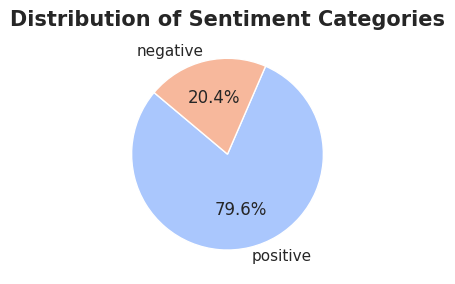

In [ ]:
plot_sentiment_pie_chart(train_df)

**Insights on Sentiment Distribution**

The sentiment distribution of the dataset is highly imbalanced:

- **20.4% Negative Sentiment**: Only a small portion of the dataset expresses negative sentiment.
- **79.6% Positive Sentiment**: The majority of the dataset shows positive sentiment.

This imbalance could impact model performance, as models may become biased towards the majority class (positive sentiment). It might be necessary to apply techniques like **oversampling**, **undersampling**, or **class-weight adjustments** to address the imbalance for more accurate predictions.


# Feature Analysis

**Feature Analysis**

This section focuses on extracting and analyzing key linguistic features that can help in understanding text structure and sentiment patterns. These features are useful for enhancing model performance by providing more informative inputs.

**Syllable Count**  
Analyzing the number of syllables helps assess text complexity and readability, which may correlate with sentiment intensity.

**Sentence Length Distribution**
Understanding the variation in sentence lengths can reveal stylistic differences and emotional tone in text data.

**Root Words Analysis**
Examining root words (lemmas) highlights the core meaning of sentences and reduces dimensionality by grouping word variants.

**Extracting Word Formation Features**
Capturing structural elements like prefixes, suffixes, or word shapes can provide cues about word function and sentiment tendencies.


In [ ]:
# Store the 'text' column in a variable
text_data = train_df['text']
# Ensure text_data has no NaN values and is in string format
text_data = text_data.fillna('').astype(str)

## Syllable Count

**Syllable Counting:**

- For each word in the text, the script uses the **CMU Pronouncing Dictionary** to find the number of syllables (based on phonemes ending in digits, e.g., `AH1`).
- If a word is not found in the dictionary, it defaults to **1 syllable**.

**Sentence Syllable Count:**

- The total syllables for each sentence are calculated by **summing** the syllable counts of all words in that sentence.

**Visualization:**

- A **histogram** is plotted using **Seaborn** to show the frequency of sentences with varying syllable counts.
- Custom styling is applied to enhance visual appeal.
- The plot provides insights into the **complexity of the text data**, helping to analyze **sentence structure** or **readability**.

**Why are we doing this?**

Understanding syllable distribution helps assess the **linguistic complexity and readability** of the text. Sentences with higher syllable counts often indicate more complex vocabulary and structure, which is important in **sentiment analysis**, **readability scoring**, or **text simplification tasks**.


<Figure size 640x480 with 0 Axes>

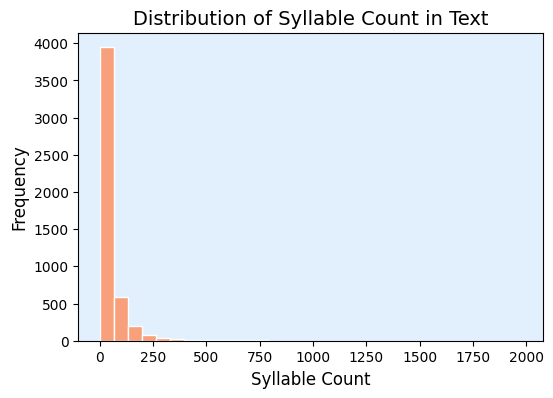

In [ ]:
# Load CMU Pronouncing Dictionary
d = cmudict.dict()

# Syllable count function using CMU Pronouncing Dictionary
def syllable_count(word):
    word = word.lower()
    if word in d:
        # Count syllables in the word
        return max([len([y for y in pron if y[-1].isdigit()]) for pron in d[word]])
    else:
        return 1  # Default to 1 if word is not in CMU dict

# Apply syllable count to words in each sentence
syllable_counts = text_data.apply(
    lambda x: sum([syllable_count(word) for word in word_tokenize(x)])
)
plt.gcf().set_facecolor('#b1d8fe')  # Set figure background color
# Plot syllable count distribution using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(syllable_counts, bins=30, kde=False, color='#ff864f', edgecolor='white')
plt.title('Distribution of Syllable Count in Text', fontsize=14)
plt.xlabel('Syllable Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Set the axis background color to a light blue
plt.gca().set_facecolor('#e2f0fe')
plt.show()

**Insights on Syllable Count Distribution**

- **Distribution Shape**: The syllable count distribution is heavily **right-skewed**, indicating that most text samples have relatively low syllable counts.
  
- **Peak of the Distribution**: The **mode** is observed at the lower end, with many samples having syllable counts under 100. This suggests that the majority of sentences in the dataset are relatively simple in terms of syllable complexity.

- **Outliers/Long-Tail Texts**: There are **outliers** in the dataset with syllable counts reaching up to 3500, but these instances are **rare**. These long-tail samples could represent complex, longer texts or perhaps some noise in the data.

This distribution insight helps understand the general complexity of the text data and the presence of both simple and exceptionally complex samples, which could influence further text analysis and model training.


## Sentence Length Distribution

1. **Sentence Length Calculation:**  
   It calculates the length of each sentence by counting the number of words in it. This is done by tokenizing each sentence using `nltk.word_tokenize()`, then calculating the length of the tokenized sentence.

2. **Data Preparation:**  
   The sentence lengths are stored in a DataFrame (`sentence_lengths_df`) for easier handling, especially when plotting using Seaborn.

3. **Plotting:**  
   A histogram is created to show the distribution of sentence lengths. The `sns.histplot()` function is used, which provides a histogram along with an optional Kernel Density Estimate (KDE) curve. This is done with a light green color for the bars.

4. **Title and Labels:**  
   The plot is given a title ("Sentence Length Distribution") and labeled axes: the x-axis represents the "Sentence Length (Number of Words)", and the y-axis represents the "Frequency".

**Why are we doing this?**  
Understanding the **distribution of sentence lengths** helps identify the **complexity and variability of the text**. This insight can inform decisions on **text truncation, padding, or segmentation**, especially when preparing text data for machine learning models like RNNs, LSTMs, or transformers, which may have input length constraints.


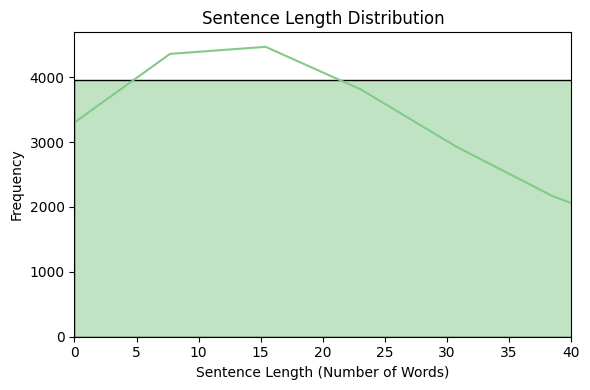

In [ ]:
# Calculate sentence length (number of words in each sentence)
sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in text_data]

# Convert to a DataFrame for easier handling in Seaborn
sentence_lengths_df = pd.DataFrame(sentence_lengths, columns=["Sentence Length"])

# Plot sentence length distribution using Seaborn
plt.figure(figsize=(6, 4))
sns.histplot(sentence_lengths_df['Sentence Length'], bins=30, kde=True, color="#83ca89")
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')

# Set x-axis limit to 40
plt.xlim(0, 40)

plt.tight_layout()
plt.show()

**Insights on Sentence Length Distribution**

- **Peak Around 15 Words**: The distribution peaks at **15 words per sentence**, indicating that most sentences in the dataset are around this length. This is typical for natural language, where sentences tend to be of moderate length.

- **Decline in Frequency**: There is a **steady decline** in frequency as the sentence length increases beyond 15 words, suggesting that **longer sentences** are less common.

- **Short Sentences**: Sentences with fewer than **5 words** are also relatively **less common** compared to sentences in the range of **10–20 words**. This shows that short sentences are less frequent in this dataset.

- **Right-Skewed Distribution**: The chart displays a **slightly right-skewed distribution**, which is typical for natural language. This implies that **short and medium-length sentences** dominate the data, while longer sentences become progressively rarer.

These insights offer a better understanding of the text's sentence structure, indicating a tendency towards more concise, moderate-length sentences in the dataset.


## Root Words Analysis

Lemmatization is a **natural language processing** technique that reduces words to their base or root form (e.g., "running" → "run"). This script uses the **WordNet Lemmatizer** to:

1. Tokenize and lemmatize words in the text dataset.  
2. Compare original words with their lemmatized forms.  
3. Visualize the count of words that need lemmatization versus those already in their root form.

**Why are we doing this?**  
Lemmatization helps in **reducing lexical variation** and ensures that different forms of the same word are treated uniformly. This is especially important for **text classification, clustering, and topic modeling**, where consistency in word forms can significantly improve model performance. The bar chart provides a quick visual check of how much preprocessing is required for the dataset.


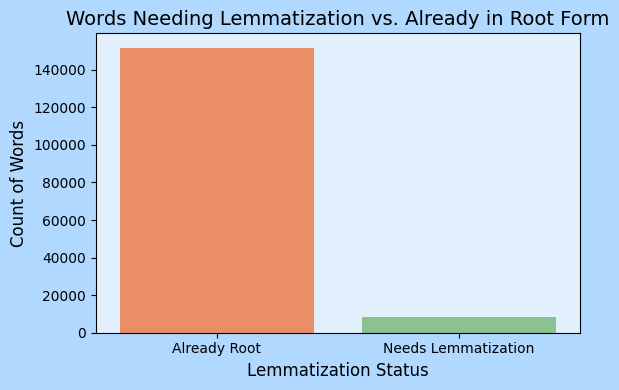

In [ ]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenize and lemmatize words in the text data
all_words = ' '.join(text_data).split()
lemmatized_words = [lemmatizer.lemmatize(word) for word in all_words]

# Compare original words and lemmatized words
comparison_df = pd.DataFrame({
    'Original Word': all_words,
    'Lemmatized Word': lemmatized_words
})
comparison_df['Needs Lemmatization'] = comparison_df['Original Word'] != comparison_df['Lemmatized Word']

# Count words that require lemmatization
lemmatization_counts = comparison_df['Needs Lemmatization'].value_counts()

# Plot the data using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(
    x=lemmatization_counts.index.map({False: 'Already Root', True: 'Needs Lemmatization'}),
    y=lemmatization_counts.values,
    palette=["#ff864f", "#83ca89"]
)

# Set the background and labels
plt.gcf().set_facecolor('#b1d8fe')  # Set figure background color
plt.gca().set_facecolor('#e2f0fe')  # Set axis background color
plt.title('Words Needing Lemmatization vs. Already in Root Form', fontsize=14)
plt.xlabel('Lemmatization Status', fontsize=12)
plt.ylabel('Count of Words', fontsize=12)
plt.tight_layout()
plt.show()

**Insights on Lemmatization vs. Root Form Words**

- **Already in Root Form**: A significant majority of the words in the dataset, more than **140,000 words**, are already in their **root form**. This indicates that a large portion of the text is composed of base words without requiring further transformation.

- **Need Lemmatization**: Around **10,000 words** in the dataset require **lemmatization**. These are words in inflected or derived forms (e.g., "running" to "run"), which need to be reduced to their base form for consistency and better model performance.

This analysis highlights that most of the text is already in a usable format for NLP tasks, but there is still a smaller subset that will benefit from lemmatization, potentially improving downstream tasks like text classification or topic modeling.


## Extracting Word Formation Features

This script identifies and counts **word formation patterns** in the text data:

1. **Root Words** – Words already in their base form.  
2. **Suffixes** – Words ending with **"ing"** or **"ed"**, indicating progressive or past tense forms.  
3. **Prefixes** – Words starting with **"un"**, often indicating negation.  
4. **Pluralization** – Words that differ from their lemmatized root, suggesting plural forms.

**Why are we doing this?**  
Analyzing word formation helps us understand **morphological complexity** in the dataset. It reveals how often certain grammatical forms (e.g., tense, negation, plurality) appear, which can provide insights into **text style, sentiment**, or **author intent**. These features can also improve performance in downstream tasks like **sentiment analysis, topic modeling**, or **readability scoring**. Visualizing them in a bar chart makes it easy to observe their distribution and compare frequencies.


<Figure size 640x480 with 0 Axes>

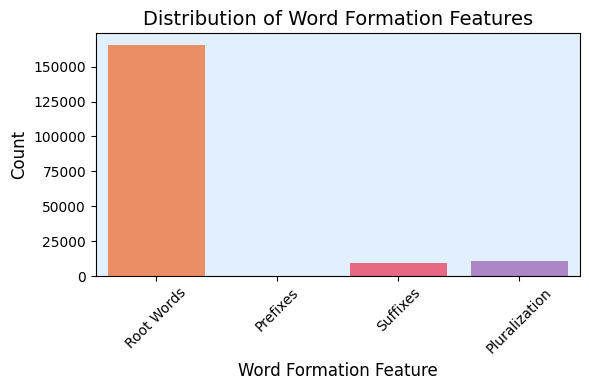

In [ ]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Extract word formation features
features = {
    "Root Words": 0,
    "Prefixes": 0,
    "Suffixes": 0,
    "Pluralization": 0,
}

for sentence in text_data:
    for word in word_tokenize(sentence):
        root = lemmatizer.lemmatize(word.lower())
        if word.endswith("ing") or word.endswith("ed"):
            features["Suffixes"] += 1
        elif word.startswith("un"):
            features["Prefixes"] += 1
        elif root != word.lower():
            features["Pluralization"] += 1
        else:
            features["Root Words"] += 1

# Convert features dictionary to DataFrame
features_df = pd.DataFrame(list(features.items()), columns=["Feature", "Count"])

plt.gcf().set_facecolor('#b1d8fe')  # Set figure background color

# Plot using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x="Feature", y="Count", data=features_df, palette=["#ff864f", "#83ca89", "#fa5477", '#ac7cd1'])
plt.title("Distribution of Word Formation Features", fontsize=14)

# Calculate the maximum count for annotation positioning
max_count = features_df["Count"].max()

plt.xlabel("Word Formation Feature", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
# Set the axis background color to a light blue
plt.gca().set_facecolor('#e2f0fe')
plt.tight_layout()
plt.show()

**Insights on Word Formation Features**

- **Root Words**: The majority of the words in the dataset, approximately **150,000 words**, are already in their **root form**. This suggests that the text predominantly consists of base words that don't require significant transformation.

- **Suffixes and Pluralization**: Both **suffixes** (words ending in "ing" or "ed") and **pluralization** (words differing from their lemmatized root) together account for fewer than **25,000 words**. This indicates that a smaller portion of the dataset involves word variations that can be identified through suffix patterns or pluralization.

This distribution highlights that while most words are in their base form, a smaller but significant portion of words might need attention through processes like stemming or lemmatization to ensure uniformity for further analysis or model building.


# Data Preprocessing

## Variable Initialization for Model Evaluation





These lists help track the **training and validation performance** across different learning approaches (unsupervised and discriminative models). By storing and analyzing these values, we can evaluate how well the models generalize to unseen data, compare the effectiveness of different methods, and identify potential improvements in the model architecture or training process.

In [ ]:
# For unsupervised learning phase
average_training_unsup = []  # Stores average metrics (accuracy, precision, recall, f1) for unsupervised training
average_val_unsup = []  # Stores average metrics for validation during unsupervised training
metrics_unsup = [] # Stores individual confusion metrics during unsupervised training

# For discriminative learning phase
average_training_dis = []  # Stores average metrics for discriminative training
average_val_dis = []  # Stores average metrics for validation during discriminative training
metrics_dis = []  # Stores individual confusion metrics during discriminative training

## Preprocessing Function for Text Data

**Text Preprocessing Function Explanation:**

---

**Step-by-Step Breakdown**

1. Lemmatization
- **What it does:** Reduces words to their root form (e.g., "running" → "run").
- **Why it's important:** Helps the model treat variations of a word as a single concept, improving generalization.

2. Stopwords Removal
- **What it does:** Removes common words like “the”, “is”, “in” which add little meaning.
- **Why it's important:** Reduces noise, improves signal in data, especially for tasks like classification and clustering.

3. Text Cleaning
- **What it does:**
  - Converts text to lowercase.
  - Removes URLs, punctuation, extra spaces, and square brackets.
- **Why it's important:**
  - Ensures uniform formatting.
  - Strips irrelevant elements that don't contribute to sentiment or topic.

4. Splitting and Filtering
- **What it does:** Splits text into tokens, lemmatizes each, and filters stopwords.
- **Why it's important:** Leaves only meaningful, normalized words for downstream NLP tasks.

---

---

**Preprocessing Justification: Theoretical and Practical Foundations**

| Justification         | Theoretical Basis                                                     | Practical Impact                                                       |
|----------------------|------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Lemmatization**     | Linguistics theory: transforms inflected forms to base forms           | Helps reduce dimensionality while preserving semantics                 |
| **Stopword Removal**  | Zipf’s Law: high-frequency words carry less information                | Reduces feature space and computational cost, enhances model focus     |
| **Lowercasing**       | Normalization in IR and NLP tasks                                      | Ensures tokens like “Apple” and “apple” are treated the same           |
| **URL & Symbol Removal** | Information noise filtering                                          | Eliminates non-linguistic content that confuses models                 |
| **Token Filtering**   | Cognitive load reduction, semantic clarity                             | Improves interpretability and feature quality for clustering/classification |

---

**Comparison of Common Preprocessing Techniques (With Justification)**


| Technique                  | Description & Variants                                                                                  | Included in Our Pipeline? | Why This Matters                                                                                       | Justification for Our Choice / Exclusion                                                        |
|---------------------------|-----------------------------------------------------------------------------------------------------------|----------------------------|----------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Lowercasing**           | Converts all text to lowercase (e.g., “Happy” → “happy”)                                                  | Yes                     | Ensures uniformity; avoids treating “Happy” and “happy” as different tokens.                            | Essential for reducing feature space and avoiding case-based duplication.                       |
| **Stopword Removal**      | Removes common non-informative words (e.g., "the", "is", "in")                                            | Yes                     | Helps reduce noise and focus on meaningful words.                                                        | We used NLTK's stopword list — a practical choice that improves classification performance.     |
| **Lemmatization**         | Converts words to their base form. Variants: <br>• WordNetLemmatizer (our choice) <br>• spaCy <br>• Stemming (Porter, Snowball) | Yes (WordNet)           | Reduces inflectional forms and standardizes meaning.                                                     | WordNet is slower but more linguistically accurate than stemming. Better for semantic tasks.    |
| **Stemming**              | Truncates to root (e.g., “running” → “run” or “runn”)                                                     | No                      | Crude and may distort meaning; less accurate than lemmatization.                                        | We preferred lemmatization for better language representation — correct for semantic analysis.  |
| **Tokenization**          | Splits text into individual words or subwords                                                             | Yes                     | Needed for nearly all NLP tasks; basis for feature extraction.                                           | A standard and necessary step — well-handled in our preprocessing function.                     |
| **URL Removal**           | Removes hyperlinks from the text                                                                          | Yes                     | URLs carry no semantic sentiment; removing reduces irrelevant noise.                                     | A good choice — it improves clarity, especially for user-generated text.                        |
| **Punctuation Removal**   | Removes symbols like . , ? ! etc.                                                                          | Yes                     | Helps simplify text and reduce token clutter.                                                            | Important for traditional models like TF-IDF or clustering.                                     |
|                                          |
| **Special Char & Emoji Removal** | Removes emojis, hashtags, etc. (often used in informal/social media)                                  | No                      | Emojis can carry sentiment (😊, 😡), useful in emotion/sentiment tasks.                                  |  Keeping emojis could boost performance in informal datasets (e.g., tweets, reviews). We excluded this for now, but would reconsider if analyzing social media text.  |
| **Spelling Correction**   | Fixes typos and variants (e.g., “hapy” → “happy”)                                                          | No                      | Enhances consistency and reduces sparsity — but computationally expensive.                              | We skipped this due to resource constraints and this could also help tp predict.   |
         |
| **TF-IDF Weighting**      | Converts cleaned text to feature vectors (numerical)                                                      | Yes (in our model)      | Helps highlight rare and informative terms.                                                              | A well-chosen vectorizer for traditional clustering/classification pipelines.                   |
| **Embeddings (e.g., BERT)** | Transforms sentences into dense vectors using models like SentenceTransformer                             | Yes (BERTopic step)     | Captures deep semantic relationships beyond word-level features.                                         | A strong addition for topic modeling and unsupervised sentiment detection.                      |
                     |

---

**Summary:**

- We prioritized **clean, semantically meaningful representation** of text for clustering and sentiment modeling.
- Chose **lemmatization (WordNet)** over stemming — good for interpretability and semantic coherence.
- Excluded things like emoji removal and spelling correction — valid if the dataset is formal and clean.
- Combined **traditional vectorization (TF-IDF)** with **semantic embeddings** — a strong hybrid approach.

---


In [ ]:
# Define a function to return a preprocessor for text data
def get_preprocessor():
    """
    Returns a text preprocessing function that:
    1. Converts text to lowercase
    2. Removes URLs and square bracketed content
    3. Strips punctuation and extra whitespace
    4. Lemmatizes words and removes common stopwords

    This function uses the NLTK library's stopwords and WordNetLemmatizer for processing text.

    Returns:
        preprocess_text (function): A function that takes a text string as input and returns the preprocessed string.
    """

    # Initialize the lemmatizer from NLTK (used to reduce words to their root form)
    lemmatizer = WordNetLemmatizer()

    # Load the list of common stop words in English from NLTK
    stop_words = set(stopwords.words("english"))

    # Define the inner function that will preprocess the text
    def preprocess_text(text):
        """
        Preprocesses a given text string by conditionally:
        1. Converting to lowercase.
        2. Removing content inside square brackets.
        3. Removing URLs.
        4. Removing punctuation.
        5. Normalizing whitespace.
        6. Lemmatizing and removing stopwords.

        Args:
            text (str): The input text to be preprocessed.

        Returns:
            str: The cleaned and processed text.
        """
        if pd.isna(text):
            return ""

        # Step 1: Convert to lowercase if not already lowercase
        if any(char.isupper() for char in text):
            text = text.lower()

        # Step 2: Remove text inside square brackets if brackets exist
        if "[" in text and "]" in text:
            text = re.sub(r"\[.*?\]", "", text)

        # Step 3: Remove URLs if any common URL patterns are found
        if "http" in text or "www." in text:
            text = re.sub(r"https?://\S+|www\.\S+", "", text)

        # Step 4: Remove punctuation if punctuation characters exist
        if any(char in string.punctuation for char in text):
            text = text.translate(str.maketrans("", "", string.punctuation))

        # Step 5: Normalize whitespace if needed
        if "  " in text or text != text.strip():
            text = re.sub(r"\s+", " ", text).strip()

        # Step 6: Lemmatize and remove stopwords if there are words
        words = text.split()
        if words:
            words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
            text = " ".join(words)

        return text


    # Return the preprocess_text function
    return preprocess_text

# Method Unsupervised Start

In this section you will write all details of your Method 1.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


## Function for Model Evaluation and Analysis
This section covers the functions used for evaluating and analyzing model performance, including text preprocessing, classification evaluation, and cluster quality assessment.


### Preprocessing for Training and Validation Datasets




**Purpose:**
This function is designed to load and preprocess both the training and validation datasets, ensuring that the data is cleaned and ready for analysis or model training. The function performs essential steps, such as handling missing values and applying a custom preprocessing function to the text data.

**Why is this needed?**
Preprocessing text data is a critical step in natural language processing (NLP) workflows. Raw text data often contains noise, such as missing values or irrelevant content, which can impact model performance. This function:

1. Ensures that datasets are free from missing or incomplete text entries.
2. Applies custom preprocessing (like tokenization, lemmatization, or stopword removal) to make the text consistent and suitable for further analysis or training.

**What does this function do?**
- **Prints the shape of the input data**: This provides a quick overview of the number of records in the training and validation datasets.
- **Drops rows with missing text**: Any records in the datasets where the text is missing are removed to ensure the quality of the data.
- **Applies preprocessing**: A custom preprocessing function is applied to the "text" column to transform the data (e.g., removing stopwords, stemming, or lemmatization) into a form suitable for model input.

**Output:**
The function returns the preprocessed training and validation datasets, which can now be used for further analysis or model building.

In [ ]:
def load_and_preprocess(train_df, val_df, preprocess_fn):
    """
    Loads and preprocesses training and validation data by:
    1. Printing the shape of the input data.
    2. Dropping rows with missing text in both the training and validation data.
    3. Applying the provided preprocessing function to the "text" column.

    Args:
        train_df (pd.DataFrame): The training dataset, which must contain a "text" column.
        val_df (pd.DataFrame): The validation dataset, which must contain a "text" column.
        preprocess_fn (function): A function that will preprocess the "text" column.

    Returns:
        pd.DataFrame: The preprocessed training and validation datasets.
    """

    # Print the shape of the training and validation datasets to provide an overview of the data
    print(f"Train data shape: {train_df.shape}")
    print(f"Validation data shape: {val_df.shape}")

    # Iterate over both training and validation datasets
    for df in [train_df, val_df]:
        # Print the number of records being processed
        print(f"Preprocessing {df.shape[0]} records...")

        # Drop rows where the 'text' column is NaN
        df.dropna(subset=["text"], inplace=True)

        # Apply the preprocessing function to the 'text' column
        df["text"] = df["text"].apply(preprocess_fn)

    # Return the preprocessed training and validation datasets
    return train_df, val_df

### Plotting Confusion Matrix




**Purpose:**
This function generates and visualizes a confusion matrix to assess the performance of a classification model. It shows how predicted labels compare to true labels, helping to identify misclassifications.

**Why is this needed?**
A confusion matrix is a valuable tool for evaluating classification models. It provides insight into the model’s accuracy, precision, recall, and other metrics by visualizing true positive, false positive, true negative, and false negative values.

In [ ]:
def plot_confusion_matrix(true_labels, predicted_labels, labels=None, title="Confusion Matrix", n_clusters = 2):
    """
    Plots a confusion matrix using a heatmap.

    Args:
        true_labels (array-like): Array of true labels (actual values).
        predicted_labels (array-like): Array of predicted labels (predicted by the model).
        labels (array-like, optional): List of class labels to display on the axes. If None, the labels will be inferred from the data.
        title (str, optional): The title of the confusion matrix plot. Default is "Confusion Matrix".
    """

    # Compute the confusion matrix based on true labels and predicted labels
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

    # Store the full matrix
    metrics_unsup.append({
        "n_clusters": n_clusters,
        "confusion_matrix": cm.tolist()
    })

    # Create a figure with a specific size
    plt.figure(figsize=(3, 3))

    # Create a heatmap using Seaborn, with annotations for each cell (the count), formatted as integers
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)

    # Labeling the x-axis and y-axis
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    # Set the title for the plot
    plt.title(title)

    # Adjust the layout so everything fits properly
    plt.tight_layout()

    # Display the plot
    plt.show()

### Silhouette Score Visualization for Clusters



**Purpose:**
This section calculates and visualizes the silhouette score, which helps in evaluating the quality of clustering.

**Why is this needed?**
The silhouette score measures how similar each point is to its own cluster compared to other clusters. A higher score indicates that the samples are well-clustered, while a lower score suggests that the clustering might need adjustments.

In [ ]:
def plot_silhouette(X, labels, title="Silhouette Scores for Clusters"):
    """
    Plots the silhouette scores distribution for clustering results.

    Args:
        X (array-like): The feature data (input data for clustering).
        labels (array-like): The cluster labels (predicted by the clustering algorithm).
        title (str, optional): The title of the plot. Default is "Silhouette Scores for Clusters".
    """

    # Calculate the overall silhouette score for the clustering
    sil_score = silhouette_score(X, labels)

    # Print the silhouette score (excluding noise points) for feedback
    print(f"Silhouette Score (excluding noise): {sil_score:.4f}")

    # Calculate the silhouette score for each sample
    sil_samples = silhouette_samples(X, labels)

    # Set up the style for the plot (whitegrid style from seaborn for a clean look)
    sns.set(style="whitegrid")

    # Create a new figure with a specific size
    plt.figure(figsize=(6, 4))

    # Plot a histogram of the silhouette scores for individual samples, with Kernel Density Estimation (KDE)
    sns.histplot(sil_samples, bins=25, kde=True)

    # Set the title of the plot
    plt.title(title)

    # Label the x-axis (Silhouette Coefficient)
    plt.xlabel("Silhouette Coefficient")

    # Label the y-axis (Count of samples)
    plt.ylabel("Count")

    # Adjust the layout to ensure everything fits within the figure
    plt.tight_layout()

    # Display the plot
    plt.show()

## Training Unsupervised Method Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.


This function implements an unsupervised learning pipeline for sentiment analysis. The pipeline utilizes a combination of **BERTopic** for topic modeling, **HDBSCAN** for clustering, **KMeans** for further clustering analysis, and **ADASYN** for handling class imbalance. The steps include topic modeling, clustering, and data balancing, followed by model evaluation on both training and validation sets.


**1. Why KMeans for Clustering?**

Since our goal is to predict sentiment (positive or negative) in an unsupervised manner, we use **KMeans** for clustering the text data. Here's why it's appropriate:

- **Text Data Clustering**: The text data contains inherent patterns related to sentiment, and KMeans helps to partition this data into clusters. While we don't have explicit sentiment labels, **KMeans allows us to divide the data into two main clusters** (positive and negative sentiments), aligning with the sentiment prediction task.
  
- **Fixed Number of Clusters**: KMeans requires us to define the number of clusters upfront. In sentiment analysis, we can assume that there are two primary sentiments (positive and negative), making it a natural fit for this task. KMeans will group the data accordingly and can help us understand the distribution of sentiments based on clustering.

- **Efficiency**: KMeans is fast and works well on large datasets, which is common for text analysis tasks. Its simplicity in clustering makes it suitable for this unsupervised learning scenario where no labeled data is available.

**2. Why HDBSCAN for Clustering?**

**HDBSCAN** is chosen for density-based clustering, which is useful in this context for the following reasons:

- **Handling Noise**: In sentiment analysis, some documents may not fit neatly into either positive or negative sentiment (e.g., ambiguous or neutral content). **HDBSCAN excels in identifying and labeling these "noisy" documents** that don’t belong to any clear cluster, providing a more refined clustering approach compared to traditional methods like KMeans.
  
- **No Predefined Number of Clusters**: Unlike KMeans, HDBSCAN does not require specifying the number of clusters in advance. Since the sentiment data may not always follow a strict binary classification, **HDBSCAN's ability to discover clusters of varying shapes and densities is beneficial** for uncovering hidden structures in the data.

- **Better for Imbalanced Data**: The dataset might have an imbalance between positive and negative sentiments (e.g., more positive reviews). **HDBSCAN is robust to varying cluster sizes** and can identify clusters even in imbalanced datasets, making it ideal for handling cases where the sentiment distribution is skewed.

**3. Why ADASYN for Data Balancing?**

**ADASYN** is employed to tackle the issue of class imbalance, which is common in many real-world sentiment datasets. Here’s why it’s used:

- **Handling Class Imbalance**: In sentiment datasets, one class (e.g., positive sentiment) often dominates the other (e.g., negative sentiment). **ADASYN oversamples the minority class** by generating synthetic samples that mimic the minority class's characteristics. This helps balance the dataset and prevent the model from being biased toward the majority class.
  
- **Improving Model Performance**: Without balancing the dataset, the model may favor predicting the majority sentiment, leading to poor classification performance for the minority class. **ADASYN helps improve accuracy and robustness**, especially when dealing with underrepresented sentiments.

- **Synthetic Sample Generation**: Unlike simple oversampling techniques, ADASYN generates synthetic samples that are adaptive to the feature space of the minority class. This targeted sampling allows the model to learn better decision boundaries for the minority class.

**4. Why BERTopic for Topic Modeling?**

**BERTopic** is used for topic modeling, which serves as an initial step in extracting the latent structure of the text data. Here's why it's a strong choice:

- **Contextual Understanding with Embeddings**: Sentiment can often be expressed through complex topics or themes within the text. **BERTopic leverages embeddings (e.g., from SentenceTransformer)** to capture the semantic meaning of the text, ensuring that the clustering is based on meaning rather than just word frequency.
  
- **Dynamic Topic Discovery**: **BERTopic dynamically discovers topics** in the text, which is useful when the sentiment expression may be tied to diverse themes (e.g., topics around customer service, product quality, etc.). The discovered topics are then used for further clustering, allowing us to categorize the sentiment effectively.

- **Flexible Clustering with HDBSCAN**: **BERTopic combines HDBSCAN** for clustering, which enhances topic modeling by not forcing every document to fit into a predefined cluster, making it more flexible in identifying meaningful patterns within the data.

---

**Summary Comparison of Techniques:**

| Technique       | Reason for Selection                                                                                             | Strengths and Fit for the Dataset                                            |
|-----------------|-------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **KMeans**      | To cluster the data into two main sentiment clusters (positive/negative).                                          | Efficient for large datasets, works well with predefined cluster numbers.    |
| **HDBSCAN**     | To handle noise and uncover clusters of varying densities in the sentiment data.                                 | No need for predefined clusters, handles imbalanced and noisy data.          |
| **ADASYN**      | To balance the classes by generating synthetic samples for the minority class.                                    | Targets the minority class, improving model accuracy for imbalanced data.    |
| **BERTopic**    | To extract latent topics and understand the structure of the sentiment data through embeddings and dynamic topics. | Extracts meaningful topics, works with embeddings for semantic understanding. |

---
**Alternative Methods vs. Our Pipeline**

| **Method / Model**            | **Category**             | **Why It’s Commonly Used**                                                                 | **Why We Did _Not_ Choose It / Why We Chose Ours Instead**                                              |
|------------------------------|--------------------------|---------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **DBSCAN**                   | Clustering               | Identifies clusters of arbitrary shape and handles noise.                                  | Less stable with high-dimensional embeddings (e.g., from BERT); **HDBSCAN** is a more robust alternative. |
| **Agglomerative Clustering** | Clustering               | Builds a hierarchy of clusters; useful for exploratory analysis.                           | Slower on large datasets; lacks noise handling; no dynamic pruning like **HDBSCAN**.                     |
| **Spectral Clustering**      | Clustering               | Good for non-convex clusters, graph-based approach.                                        | Computationally expensive for large text datasets; **KMeans** is more scalable.                         |
| **SMOTE**                    | Data Balancing           | Popular oversampling method; generates synthetic data.                                     | **ADASYN** is more adaptive — focuses on harder-to-learn minority samples, not just nearest neighbors.  |
| **Random Oversampling**      | Data Balancing           | Simple way to duplicate minority samples.                                                  | Risk of overfitting due to duplication; **ADASYN** avoids this by generating varied synthetic data.     |
| **LDA**                      | Topic Modeling           | Traditional model that discovers word-topic distributions.                                 | Doesn’t capture context or word order; **BERTopic** (with embeddings) is more semantic-aware.           |
| **NMF**                      | Topic Modeling           | Factorization-based method often used for interpretable topic models.                      | Less effective with contextual embeddings; **BERTopic** provides deeper topic representation.           |
| **UMAP + Clustering**        | Dim. Reduction + Clustering | UMAP visualizes structure and helps with clustering post-embedding.                     | Already integrated into **BERTopic**, which uses UMAP + HDBSCAN under the hood.                         |
| **Autoencoders**             | Representation Learning  | Can learn latent semantic structure in text.                                               | Require labeled validation, less explainable; **BERTopic + clustering** is more interpretable.          |
| **LSTM/GRU + Clustering**    | Deep Learning            | Captures sequential context before clustering.                                             | Computationally intensive; **SentenceTransformers** already encode rich sentence semantics efficiently. |

---

**Why Our Choices Were Appropriate**

| **Technique**   | **Practical Reason**                                                           | **Technical Strength**                                                                 |
|-----------------|--------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| **HDBSCAN**     | Handles noisy and imbalanced real-world data without needing predefined `k`.  | Allows clustering with varied densities and automatically labels outliers.             |
| **KMeans**      | Assumes known number of sentiment categories (2), fits binary sentiment task. | Fast, simple, scalable — ideal for clustering into fixed sentiment groups.             |
| **ADASYN**      | Improves performance on imbalanced sentiment data.                            | Generates *adaptive* synthetic samples for hard-to-learn regions in feature space.      |
| **BERTopic**    | Embedding-based topic modeling for latent structure discovery.                | Combines SOTA embeddings + UMAP + HDBSCAN for contextual, interpretable topics.         |


---
In conclusion, the combination of **KMeans** for fixed clustering, **HDBSCAN** for density-based clustering, **ADASYN** for oversampling the minority class, and **BERTopic** for dynamic topic modeling is well-suited for sentiment analysis in an unsupervised setting. Each method is selected to handle specific challenges in the dataset, such as class imbalance, noisy data, and the need for flexible topic modeling without requiring labeled sentiment data.


In [ ]:
def train_unsup(train_file, val_file, model_dir, n_clusters=2, model_save = True):
    """
    This function trains an unsupervised clustering model using BERTopic for topic modeling,
    KMeans for clustering, and ADASYN for oversampling. The workflow includes the following steps:
    1. Preprocessing the training and validation text data.
    2. Training a BERTopic model for topic extraction using embeddings.
    3. Using HDBSCAN for clustering and calculating silhouette scores.
    4. Applying ADASYN to balance the sentiment classes in the training set.
    5. Training a KMeans clustering model on the resampled data.
    6. Evaluating the model performance on both training and validation sets.
    7. Saving the trained models and sentiment-to-cluster mappings for future use.

    Args:
        train_file (str): Path to the training data CSV file, containing the text and sentiment labels.
        val_file (str): Path to the validation data CSV file, containing the text and sentiment labels.
        model_dir (str): Directory where the trained models (BERTopic, KMeans) and cluster-to-sentiment mappings will be saved.
        n_clusters (int, optional): The number of clusters for the KMeans model. Default is 2 (positive/negative).

    Returns:
        None
    """

    print("\nTraining the model...")

    ############--- Data Preprocessing ---############
    # Preprocess training and validation data
    preprocess_fn = get_preprocessor()  # Function for text cleaning, tokenization, lemmatization, etc.
    train_df, val_df = load_and_preprocess(train_file, val_file, preprocess_fn)



    ############--- Model Initialization ---############
    # Initialize embedding model (SentenceTransformer) and vectorizer model (CountVectorizer)
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
    vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

    # HDBSCAN model for density-based clustering
    cluster_model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

    # BERTopic model setup
    topic_model = BERTopic(embedding_model=embedding_model,
                           vectorizer_model=vectorizer_model,
                           hdbscan_model=cluster_model,
                           calculate_probabilities=True,
                           verbose=True)



    ############--- Topic Modeling with BERTopic ---############
    # Fit BERTopic on the training documents to extract topics
    documents = train_df["text"].tolist()
    topics, probs = topic_model.fit_transform(documents)
    train_df["bertopic_topic"] = topics  # Store the topics in the dataframe



    ############--- Embedding Extraction and Silhouette Analysis ---############
    # Generate embeddings for training data and evaluate clusters' silhouette scores
    X_train = embedding_model.encode(documents, show_progress_bar=True)
    valid_indices = train_df["bertopic_topic"] != -1  # Filter out noise (topic -1)
    X_valid = X_train[valid_indices]
    labels_valid = train_df.loc[valid_indices, "bertopic_topic"]
    plot_silhouette(X_valid, labels_valid, title="HDBSCAN Cluster Silhouette Scores (Training Set)")



    ############--- Data Balancing with ADASYN ---############
    print("Applying ADASYN oversampling...")
    y_train = train_df["sentiment"]
    adasyn = ADASYN(random_state=student_id)  # ADASYN to generate synthetic samples
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)



    ############--- KMeans Clustering ---############
    print("Training KMeans on resampled data...")
    k = len(set(y_train))  # Number of clusters (based on unique sentiment labels)

    kmeans = KMeans(n_clusters=n_clusters, random_state=student_id)
    clusters = kmeans.fit_predict(X_resampled)  # Cluster the resampled data



    ############--- Cluster to Sentiment Mapping ---############
    # Map clusters to sentiment labels based on majority class within each cluster
    cluster_to_sentiment = {}
    for cluster in np.unique(clusters):
        indices = np.where(clusters == cluster)[0]
        majority_label = Counter(y_resampled.iloc[indices]).most_common(1)[0][0]
        cluster_to_sentiment[cluster] = majority_label

    print(f"Cluster to sentiment mapping: {cluster_to_sentiment}")
    fallback_sentiment = Counter(y_resampled).most_common(1)[0][0]  # Default fallback sentiment



    ############--- Model Evaluation on Training Set ---############
    print("\nEvaluating on training set...")
    train_clusters = kmeans.predict(X_train)  # Predict clusters on training data
    train_preds = [cluster_to_sentiment.get(c, fallback_sentiment) for c in train_clusters]
    train_true = y_train.tolist()

    # Calculate accuracy and other metrics
    acc = accuracy_score(train_true, train_preds)
    p, r, f, _ = precision_recall_fscore_support(train_true, train_preds, average='weighted')
    print(f"Train Accuracy: {acc:.4f} | Precision: {p:.4f} | Recall: {r:.4f} | F1 Score: {f:.4f}")



    ############--- Model Evaluation on Validation Set ---############
    print("\nEvaluating on validation set...")
    val_docs = val_df["text"].tolist()
    X_val = embedding_model.encode(val_docs, show_progress_bar=True)
    val_clusters = kmeans.predict(X_val)  # Predict clusters on validation data
    val_preds = [cluster_to_sentiment.get(c, fallback_sentiment) for c in val_clusters]
    val_true = val_df["sentiment"].tolist()

    # Calculate and print evaluation metrics for the validation set
    acc_val = accuracy_score(val_true, val_preds)
    p_val, r_val, f_val, _ = precision_recall_fscore_support(val_true, val_preds, average='weighted')
    print(f"Val Accuracy:   {acc_val:.4f} | Precision: {p_val:.4f} | Recall: {r_val:.4f} | F1 Score: {f_val:.4f}")



    ############--- Confusion Matrix for Validation Set ---############
    # Plot confusion matrix for validation predictions
    plot_confusion_matrix(val_true, val_preds, labels=["positive", "negative"], title="Validation Set Confusion Matrix", n_clusters = n_clusters)




    ############--- Store Results for Later Analysis ---############
    # Save training and validation evaluation metrics for plotting/analysis
    average_training_unsup.append({
        "n_clusters": n_clusters,
        "accuracy": acc,
        "precision": p,
        "recall": r,
        "f1": f
    })

    average_val_unsup.append({
        "n_clusters": n_clusters,
        "accuracy": acc_val,
        "precision": p_val,
        "recall": r_val,
        "f1": f_val
    })



    ############--- Saving the Trained Models and Mapping ---############
    # Save the trained BERTopic model, KMeans model, and cluster-to-sentiment mapping to disk
    if model_save:
        os.makedirs(model_dir, exist_ok=True)
        joblib.dump(topic_model, f"{model_dir}/bertopic_model.pkl")
        joblib.dump(kmeans, f"{model_dir}/kmeans_model.pkl")
        joblib.dump(cluster_to_sentiment, f"{model_dir}/cluster_sentiment_map.pkl")
        print(f"\nModel and mapping saved at {model_dir}")


Training the model...
Train data shape: (4914, 2)
Validation data shape: (700, 2)
Preprocessing 4914 records...
Preprocessing 700 records...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-04-17 10:34:09,719 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2025-04-17 10:35:23,376 - BERTopic - Embedding - Completed ✓
2025-04-17 10:35:23,377 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 10:36:03,796 - BERTopic - Dimensionality - Completed ✓
2025-04-17 10:36:03,797 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 10:36:05,678 - BERTopic - Cluster - Completed ✓
2025-04-17 10:36:05,685 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 10:36:06,161 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

Silhouette Score (excluding noise): 0.0847


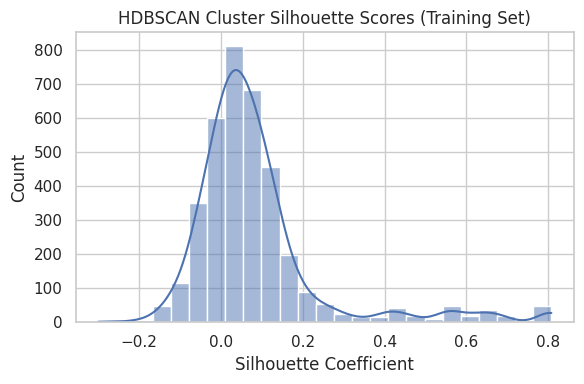

Applying ADASYN oversampling...
Training KMeans on resampled data...
Cluster to sentiment mapping: {np.int32(0): 'negative', np.int32(1): 'positive'}

Evaluating on training set...
Train Accuracy: 0.6890 | Precision: 0.6932 | Recall: 0.6890 | F1 Score: 0.6911

Evaluating on validation set...


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Val Accuracy:   0.6886 | Precision: 0.7116 | Recall: 0.6886 | F1 Score: 0.6990


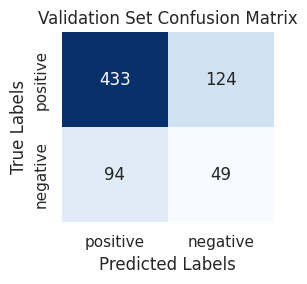


Model and mapping saved at gdrive/MyDrive/./CE807-25-SP/Assignment/model/2400570/model_unsup


In [ ]:
# Set the number of clusters for KMeans clustering
n_clusters = 2  # This defines the number of clusters the KMeans model should create, typically set to 2 for binary sentiment classification (e.g., positive and negative).

# Call the train_unsup function to train the unsupervised model on the provided training and validation datasets
train_unsup(train_df, val_df, MODEL_unsup_DIRECTORY, n_clusters)

### **Model Performance Metrics**

**Training Set**
- Accuracy: 68.90%  
- Precision: 69.32%  
- Recall: 68.90%  
- F1 Score: 69.11%

**Validation Set**
- Accuracy: 68.86%  
- Precision: 71.16%  
- Recall: 68.86%  
- F1 Score: 69.90%

These metrics are quite consistent between training and validation, suggesting:
- No major overfitting.
- The model is generalizing reasonably well.

However, accuracy alone is not sufficient for imbalanced datasets — precision, recall, and the confusion matrix provide deeper insights.

---

**Silhouette Score**

- Silhouette Score: 0.0854

Interpretation:
- A low silhouette score indicates poorly separated clusters.
- Positive and negative sentiments overlap in the embedding space.
- Indicates a need for improvement in:
  - Embedding quality
  - Feature representation
  - Potential alternative clustering techniques

---

**Confusion Matrix Breakdown**

|                        | Predicted Positive | Predicted Negative |
|------------------------|--------------------|--------------------|
| Actual Positive        | 433 (True Positive) | 124 (False Negative) |
| Actual Negative        | 94 (False Positive) | 49 (True Negative)   |

---

**Explanation and Key Insights**

True Positives (433)
- Positive examples correctly predicted.
- Strong performance on the dominant class.

False Negatives (124)
- Positive examples misclassified as negative.
- The model misses a significant number of actual positives.

False Positives (94)
- Negative examples misclassified as positive.
- Indicates bias toward predicting the majority class.

True Negatives (49)
- Negative examples correctly classified.
- Low true negative count shows difficulty in identifying negative sentiment.

---

**Summary of Insights**

- Low Recall for Negative Sentiment  
  - Of 143 actual negative samples, only 49 were correctly predicted.  
  - The model struggles with detecting negative sentiment, likely due to data imbalance.

- High False Positives  
  - 94 negative samples incorrectly predicted as positive.  
  - Indicates a model bias toward predicting "positive".

- Skewed Classifier Behavior  
  - Strong performance on positive samples, weak on negative.  
  - The classifier is affected by class imbalance.

- Precision > Recall on Validation Set  
  - The model is more accurate when it predicts positive (precision = 71.16%)  
  - But it fails to capture all actual positives (recall = 68.86%).


## Testing Method Unsupervised Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  


This function tests an unsupervised sentiment classification model by predicting sentiment labels based on clusters from the KMeans model.

**Steps:**

1. **Preprocess Test Data**:
   - **Why**: Cleans and normalizes the test data for consistency with the training data.
   - **How it helps**: Ensures the model receives data in a comparable format, improving prediction accuracy.

2. **Load Trained Models & Sentiment Mapping**:
   - **Why**: Loads the saved KMeans clustering model and cluster-to-sentiment mapping.
   - **How it helps**: Uses the same trained models for prediction, maintaining consistency.

3. **Encode Test Data**:
   - **Why**: Converts text to embeddings using **SentenceTransformer**.
   - **How it helps**: Provides vectorized representations, enabling accurate clustering by KMeans.

4. **Predict Clusters**:
   - **Why**: Predicts clusters for the test data using the KMeans model.
   - **How it helps**: Groups similar texts, allowing sentiment inference based on the cluster.

5. **Map Clusters to Sentiments**:
   - **Why**: Maps each cluster to a sentiment label using the cluster-to-sentiment mapping.
   - **How it helps**: Converts clustering results into sentiment predictions.

6. **Save Predictions**:
   - **Why**: Saves the predictions to a CSV file.
   - **How it helps**: Provides a record of sentiment predictions for further analysis.


In [ ]:
def test_unsup(test_df, model_dir, test_file):
    """
    This function tests the trained unsupervised model on the provided test dataset and predicts sentiment labels
    based on the clusters assigned by the KMeans model. The predictions are saved to a CSV file.

    The process involves:
        1. Preprocessing the test data by cleaning the text (lowercasing, stopword removal, etc.).
        2. Loading the trained KMeans clustering model and the sentiment mapping for each cluster.
        3. Encoding the preprocessed text data into vector representations using a pre-trained SentenceTransformer.
        4. Predicting clusters for the encoded test data using the KMeans model.
        5. Mapping the predicted clusters to sentiment labels based on the preloaded sentiment mapping.
        6. Saving the predicted sentiment labels along with the original test data to the specified test file.

    Args:
        test_df (pandas.DataFrame): A DataFrame containing the test dataset, where each row should include a 'text' column.
            The 'text' column will be preprocessed and used to make predictions.

        model_dir (str): The directory path where the trained models (KMeans model and cluster-to-sentiment mapping) are saved.
            The KMeans model is used for predicting clusters, and the cluster-to-sentiment mapping is used to assign sentiment labels
            to the predicted clusters.

        test_file (str): The path where the test predictions (including the sentiment labels) will be saved as a CSV file.
            The output file will contain the original test data along with the predicted sentiment labels in a new column 'out_label_model_1'.

    Returns:
        None: This function does not return any value but saves the predictions to the specified `test_file`.

    Example:
        test_unsup(test_df, "models/unsup_model", "test_predictions.csv")
    """

    ############ ---- Step 1: Preprocess the Test Data ---- ############
    print("\nTesting the model...")

    # Get the preprocessing function that applies lemmatization, stopwords removal, etc.
    preprocess_fn = get_preprocessor()

    # Apply the preprocessing function to the 'text' column of the test data
    test_df["text"] = test_df["text"].apply(preprocess_fn)


    ############ ---- Step 2: Load the Saved Models and Sentiment Mapping ---- ############
    print(f"Loading model and sentiment mapping from {model_dir}...")

    # Load the cluster-to-sentiment mapping from the saved model directory
    cluster_sentiment_map = joblib.load(f"{model_dir}/cluster_sentiment_map.pkl")

    # Load the trained KMeans clustering model
    kmeans = joblib.load(f"{model_dir}/kmeans_model.pkl")

    # Initialize the SentenceTransformer model for encoding the text
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2")



    ############ ---- Step 3: Encode the Test Data ---- ############
    print(f"Encoding {test_df.shape[0]} test records...")

    # Use the SentenceTransformer to encode the 'text' column of the test dataset into dense embeddings
    X_test = embedding_model.encode(test_df["text"].tolist(), show_progress_bar=True)



    ############ ---- Step 4: Predict Clusters for the Test Data ---- ############
    print("Predicting clusters...")

    # Use the trained KMeans model to predict the clusters for the encoded test data
    test_clusters = kmeans.predict(X_test)



    ############ ---- Step 5: Map Clusters to Sentiments ---- ############
    # Extract all sentiment labels from the cluster-to-sentiment map
    all_sentiments = list(cluster_sentiment_map.values())

    # Set a fallback sentiment in case a predicted cluster does not exist in the sentiment mapping
    fallback_sentiment = Counter(all_sentiments).most_common(1)[0]

    # Map each predicted cluster to a sentiment label using the cluster-to-sentiment mapping
    test_preds = [cluster_sentiment_map.get(c, fallback_sentiment) for c in test_clusters]



    ############ ---- Step 6: Save the Predictions ---- ############
    # Add the predicted sentiment labels to the test DataFrame as a new column
    test_df["out_label_model_1"] = test_preds

    # Save the DataFrame containing the predictions to the specified CSV file
    test_df.to_csv(test_file, index=False)

    print(f"\nTest predictions saved to {test_file}")

In [ ]:
# To test the model:
test_unsup(test_df, MODEL_unsup_DIRECTORY, test_file)


Testing the model...
Loading model and sentiment mapping from gdrive/MyDrive/./CE807-25-SP/Assignment/model/2400570/model_unsup...
Encoding 1386 test records...


Batches:   0%|          | 0/44 [00:00<?, ?it/s]

Predicting clusters...

Test predictions saved to gdrive/MyDrive/./CE807-25-SP/Assignment/data/20/test.csv


## Hyperparameter Tuning (for KMeans Clustering)

Hyperparameter tuning involves selecting the best set of parameters to optimize the performance of the KMeans clustering model. Here are the key steps and considerations for tuning:

**Choosing the Number of Clusters (k)**:
   - **Why**: The number of clusters, `k`, defines how many groups the KMeans algorithm will divide the data into.
   - **How it helps**: The optimal value of `k` ensures that the clusters are meaningful and represent the underlying structure of the data.


### Tuning KMeans Hyperparameter: Number of Clusters (`n_clusters`)

This function tunes the hyperparameter `n_clusters` for the KMeans clustering algorithm, iterating through a specified range of cluster values.



In [ ]:
def tune_hyperparameter(train_df, val_df, model_dir, cluster_range=(2, 7), cluster_step=1):
    """
    This function tunes the hyperparameter 'n_clusters' for the KMeans clustering model by training and evaluating
    the unsupervised model with different numbers of clusters. The model's performance is evaluated for each set of
    hyperparameters and saved models are stored in the specified directory.

    Args:
        train_df (pandas.DataFrame): The training dataset, which contains the text data for training.
        val_df (pandas.DataFrame): The validation dataset, which contains the text data for validation.
        model_dir (str): The directory where the trained model and mapping will be saved.
        cluster_range (tuple, optional): The range of the number of clusters to try. Default is (2, 7).
        cluster_step (int, optional): The step size for the number of clusters. Default is 1.

    Steps:
        1. Loop through the range of cluster values (from cluster_range[0] to cluster_range[1], inclusive).
        2. For each value of 'n_clusters', train the unsupervised model using the 'train_unsup' function.
        3. Save the trained model and associated files in the specified directory.
    """

    # Loop through the range of n_clusters specified by the cluster_range argument
    for n_clusters in range(cluster_range[0], cluster_range[1] + 1, cluster_step):
        print(f"Training with n_clusters = {n_clusters}")

        # Train the unsupervised model with the current number of clusters (n_clusters)
        train_unsup(train_df, val_df, model_dir, n_clusters=n_clusters, model_save = False)

### Plot Training and Validation Scores for KMeans Clustering

This function plots the training and validation scores (accuracy, precision, recall, and F1 score) against the number of clusters (`n_clusters`).


In [ ]:
def plot_train_val_scores_clusters(n_clusters_list, average_training, average_val):
    """
    This function plots training and validation scores (accuracy, precision, recall, F1 score)
    for different values of 'n_clusters' during the model tuning process. It visualizes the
    performance metrics for both the training and validation sets to evaluate how well the model
    performs with different cluster sizes.

    Args:
        n_clusters_list (list): A list of the number of clusters (n_clusters) used during training.
        average_training (list): A list of dictionaries containing the training scores for each n_clusters.
        average_val (list): A list of dictionaries containing the validation scores for each n_clusters.

    The function generates a 2x2 grid of subplots:
    - Accuracy vs. n_clusters
    - Precision vs. n_clusters
    - Recall vs. n_clusters
    - F1 Score vs. n_clusters
    """

    # Extract individual scores from the dictionaries in 'average_training' and 'average_val'
    train_accuracy = [entry['accuracy'] for entry in average_training]
    val_accuracy = [entry['accuracy'] for entry in average_val]

    train_precision = [entry['precision'] for entry in average_training]
    val_precision = [entry['precision'] for entry in average_val]

    train_recall = [entry['recall'] for entry in average_training]
    val_recall = [entry['recall'] for entry in average_val]

    train_f1 = [entry['f1'] for entry in average_training]
    val_f1 = [entry['f1'] for entry in average_val]

    # Ensure all input lists have the same length to avoid any index errors
    assert len(n_clusters_list) == len(train_f1) == len(val_f1), "All input arrays must have the same length"

    # Create subplots with 2 rows and 2 columns (for 4 different metrics)
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Plotting Accuracy vs. n_clusters
    axs[0, 0].plot(n_clusters_list, train_accuracy, label="Train Accuracy", marker='o', linestyle='-', color='blue')
    axs[0, 0].plot(n_clusters_list, val_accuracy, label="Validation Accuracy", marker='o', linestyle='--', color='cyan')
    axs[0, 0].set_title("Accuracy")
    axs[0, 0].set_xlabel("Number of Clusters (n_clusters)")
    axs[0, 0].set_ylabel("Accuracy")
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Plotting Precision vs. n_clusters
    axs[0, 1].plot(n_clusters_list, train_precision, label="Train Precision", marker='o', linestyle='-', color='green')
    axs[0, 1].plot(n_clusters_list, val_precision, label="Validation Precision", marker='o', linestyle='--', color='red')
    axs[0, 1].set_title("Precision")
    axs[0, 1].set_xlabel("Number of Clusters (n_clusters)")
    axs[0, 1].set_ylabel("Precision")
    axs[0, 1].grid(True)
    axs[0, 1].legend()

    # Plotting Recall vs. n_clusters
    axs[1, 0].plot(n_clusters_list, train_recall, label="Train Recall", marker='o', linestyle='-', color='orange')
    axs[1, 0].plot(n_clusters_list, val_recall, label="Validation Recall", marker='o', linestyle='--', color='magenta')
    axs[1, 0].set_title("Recall")
    axs[1, 0].set_xlabel("Number of Clusters (n_clusters)")
    axs[1, 0].set_ylabel("Recall")
    axs[1, 0].grid(True)
    axs[1, 0].legend()

    # Plotting F1 Score vs. n_clusters
    axs[1, 1].plot(n_clusters_list, train_f1, label="Train F1 Score", marker='o', linestyle='-', color='purple')
    axs[1, 1].plot(n_clusters_list, val_f1, label="Validation F1 Score", marker='o', linestyle='--', color='brown')
    axs[1, 1].set_title("F1 Score")
    axs[1, 1].set_xlabel("Number of Clusters (n_clusters)")
    axs[1, 1].set_ylabel("F1 Score")
    axs[1, 1].grid(True)
    axs[1, 1].legend()

    # Adjust layout for better presentation (avoid overlap of labels and titles)
    plt.tight_layout()

    # Show the plot
    plt.show()

### Plot Confusion Matrices Across Clusters

Plots confusion matrices for each clusters value used during evaluation.

In [ ]:
def plot_confusion_matrices_unsup(metrics_unsup, cols=3):
    """
    ### Plot Confusion Matrices in a Grid

    Plots all confusion matrices from the `metrics_unsup` list in a grid format.

    Parameters:
    - metrics_unsup (list): List of dicts with 'n_clusters' and 'confusion_matrix'.
    - cols (int): Number of columns in the plot grid (default is 3).
    """

    n = len(metrics_unsup)
    rows = (n + cols - 1) // cols  # Calculate number of rows needed
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = np.array(axes).reshape(-1)  # Flatten in case of 1D

    for idx, entry in enumerate(metrics_unsup):
        cm = np.array(entry["confusion_matrix"])
        n_clusters = entry["n_clusters"]

        ax = axes[idx]
        cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

        classes = ["Negative", "Positive"]
        ax.set_title(f"n_clusters = {n_clusters}")
        ax.set_xticks(np.arange(len(classes)))
        ax.set_yticks(np.arange(len(classes)))
        ax.set_xticklabels(classes)
        ax.set_yticklabels(classes)
        ax.set_ylabel('True')
        ax.set_xlabel('Predicted')

        thresh = cm.max() / 2.0
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")

        ax.grid(False)

    # Remove unused axes if any
    for i in range(n, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

### Function Calling

Training with n_clusters = 2

Training the model...
Train data shape: (4910, 3)
Validation data shape: (700, 2)
Preprocessing 4910 records...
Preprocessing 700 records...


2025-04-17 10:16:02,654 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2025-04-17 10:16:04,455 - BERTopic - Embedding - Completed ✓
2025-04-17 10:16:04,456 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 10:16:13,805 - BERTopic - Dimensionality - Completed ✓
2025-04-17 10:16:13,806 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 10:16:15,421 - BERTopic - Cluster - Completed ✓
2025-04-17 10:16:15,427 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 10:16:15,755 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

Silhouette Score (excluding noise): 0.0829


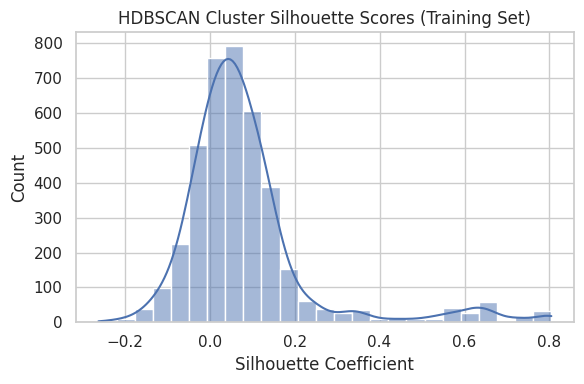

Applying ADASYN oversampling...
Training KMeans on resampled data...
Cluster to sentiment mapping: {np.int32(0): 'negative', np.int32(1): 'positive'}

Evaluating on training set...
Train Accuracy: 0.6407 | Precision: 0.6941 | Recall: 0.6407 | F1 Score: 0.6630

Evaluating on validation set...


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Val Accuracy:   0.6529 | Precision: 0.7108 | Recall: 0.6529 | F1 Score: 0.6760


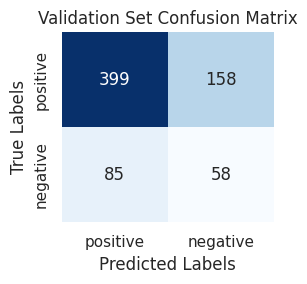

Training with n_clusters = 3

Training the model...
Train data shape: (4910, 3)
Validation data shape: (700, 2)
Preprocessing 4910 records...
Preprocessing 700 records...


2025-04-17 10:16:20,967 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2025-04-17 10:16:23,226 - BERTopic - Embedding - Completed ✓
2025-04-17 10:16:23,230 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 10:16:31,460 - BERTopic - Dimensionality - Completed ✓
2025-04-17 10:16:31,462 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 10:16:33,054 - BERTopic - Cluster - Completed ✓
2025-04-17 10:16:33,060 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 10:16:33,396 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

Silhouette Score (excluding noise): 0.0840


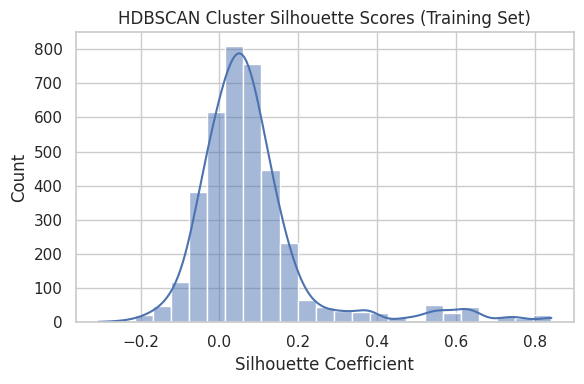

Applying ADASYN oversampling...
Training KMeans on resampled data...
Cluster to sentiment mapping: {np.int32(0): 'negative', np.int32(1): 'negative', np.int32(2): 'positive'}

Evaluating on training set...
Train Accuracy: 0.4868 | Precision: 0.7497 | Recall: 0.4868 | F1 Score: 0.5248

Evaluating on validation set...


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Val Accuracy:   0.5129 | Precision: 0.7713 | Recall: 0.5129 | F1 Score: 0.5503


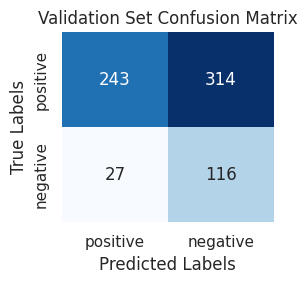

Training with n_clusters = 4

Training the model...
Train data shape: (4910, 3)
Validation data shape: (700, 2)
Preprocessing 4910 records...
Preprocessing 700 records...


2025-04-17 10:16:40,090 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2025-04-17 10:16:41,980 - BERTopic - Embedding - Completed ✓
2025-04-17 10:16:41,981 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 10:16:49,878 - BERTopic - Dimensionality - Completed ✓
2025-04-17 10:16:49,880 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 10:16:52,284 - BERTopic - Cluster - Completed ✓
2025-04-17 10:16:52,290 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 10:16:52,618 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

Silhouette Score (excluding noise): 0.0737


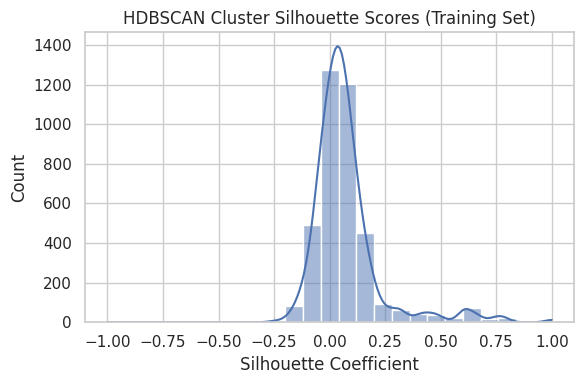

Applying ADASYN oversampling...
Training KMeans on resampled data...
Cluster to sentiment mapping: {np.int32(0): 'negative', np.int32(1): 'negative', np.int32(2): 'positive', np.int32(3): 'negative'}

Evaluating on training set...
Train Accuracy: 0.4365 | Precision: 0.7383 | Recall: 0.4365 | F1 Score: 0.4673

Evaluating on validation set...


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Val Accuracy:   0.4486 | Precision: 0.7444 | Recall: 0.4486 | F1 Score: 0.4808


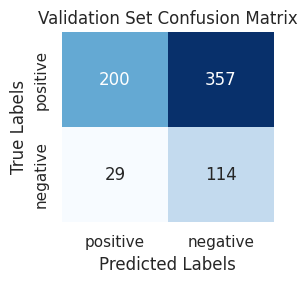

Training with n_clusters = 5

Training the model...
Train data shape: (4910, 3)
Validation data shape: (700, 2)
Preprocessing 4910 records...
Preprocessing 700 records...


2025-04-17 10:16:58,040 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2025-04-17 10:16:59,979 - BERTopic - Embedding - Completed ✓
2025-04-17 10:16:59,979 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 10:17:08,871 - BERTopic - Dimensionality - Completed ✓
2025-04-17 10:17:08,872 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 10:17:10,336 - BERTopic - Cluster - Completed ✓
2025-04-17 10:17:10,345 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 10:17:10,671 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

Silhouette Score (excluding noise): 0.0860


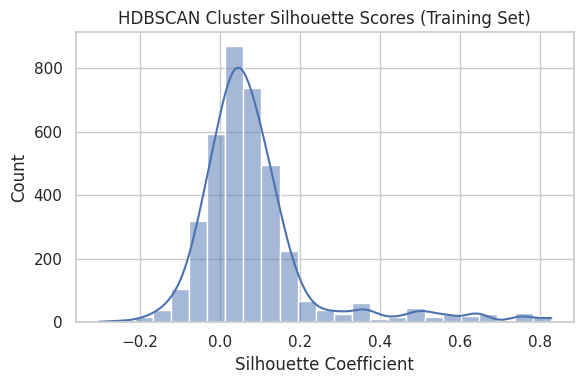

Applying ADASYN oversampling...
Training KMeans on resampled data...
Cluster to sentiment mapping: {np.int32(0): 'negative', np.int32(1): 'negative', np.int32(2): 'positive', np.int32(3): 'negative', np.int32(4): 'positive'}

Evaluating on training set...
Train Accuracy: 0.6147 | Precision: 0.7386 | Recall: 0.6147 | F1 Score: 0.6512

Evaluating on validation set...


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Val Accuracy:   0.6229 | Precision: 0.7425 | Recall: 0.6229 | F1 Score: 0.6583


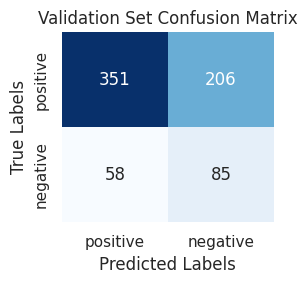

Training with n_clusters = 6

Training the model...
Train data shape: (4910, 3)
Validation data shape: (700, 2)
Preprocessing 4910 records...
Preprocessing 700 records...


2025-04-17 10:17:16,026 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2025-04-17 10:17:18,641 - BERTopic - Embedding - Completed ✓
2025-04-17 10:17:18,643 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 10:17:26,207 - BERTopic - Dimensionality - Completed ✓
2025-04-17 10:17:26,208 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 10:17:27,850 - BERTopic - Cluster - Completed ✓
2025-04-17 10:17:27,855 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 10:17:28,220 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

Silhouette Score (excluding noise): 0.0919


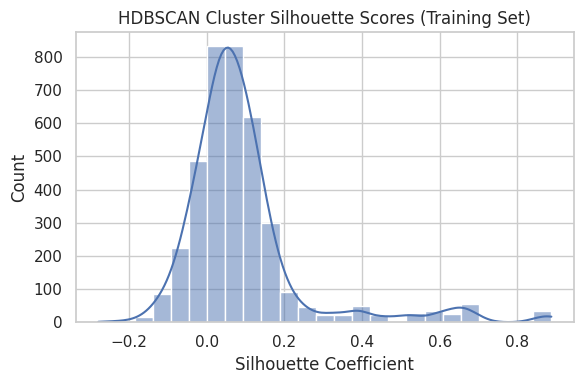

Applying ADASYN oversampling...
Training KMeans on resampled data...
Cluster to sentiment mapping: {np.int32(0): 'positive', np.int32(1): 'negative', np.int32(2): 'positive', np.int32(3): 'negative', np.int32(4): 'positive', np.int32(5): 'negative'}

Evaluating on training set...
Train Accuracy: 0.6348 | Precision: 0.7387 | Recall: 0.6348 | F1 Score: 0.6678

Evaluating on validation set...


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Val Accuracy:   0.6314 | Precision: 0.7291 | Recall: 0.6314 | F1 Score: 0.6639


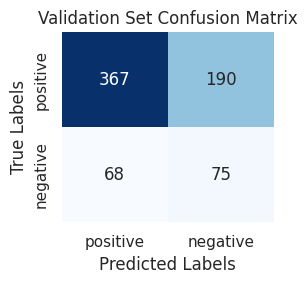

Training with n_clusters = 7

Training the model...
Train data shape: (4910, 3)
Validation data shape: (700, 2)
Preprocessing 4910 records...
Preprocessing 700 records...


2025-04-17 10:17:34,727 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

2025-04-17 10:17:36,694 - BERTopic - Embedding - Completed ✓
2025-04-17 10:17:36,695 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-17 10:17:45,099 - BERTopic - Dimensionality - Completed ✓
2025-04-17 10:17:45,102 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-17 10:17:47,129 - BERTopic - Cluster - Completed ✓
2025-04-17 10:17:47,133 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-17 10:17:47,481 - BERTopic - Representation - Completed ✓


Batches:   0%|          | 0/154 [00:00<?, ?it/s]

Silhouette Score (excluding noise): 0.0858


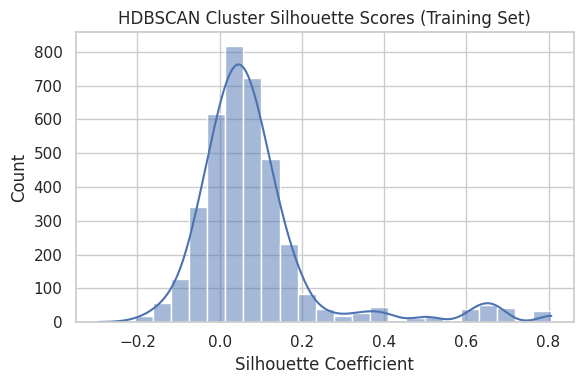

Applying ADASYN oversampling...
Training KMeans on resampled data...
Cluster to sentiment mapping: {np.int32(0): 'positive', np.int32(1): 'negative', np.int32(2): 'positive', np.int32(3): 'negative', np.int32(4): 'negative', np.int32(5): 'negative', np.int32(6): 'negative'}

Evaluating on training set...
Train Accuracy: 0.4403 | Precision: 0.7236 | Recall: 0.4403 | F1 Score: 0.4752

Evaluating on validation set...


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

Val Accuracy:   0.4414 | Precision: 0.7201 | Recall: 0.4414 | F1 Score: 0.4772


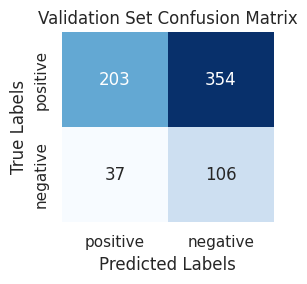

In [ ]:
average_training_unsup = []  # Stores average metrics (accuracy, precision, recall, f1) for unsupervised training
average_val_unsup = []  # Stores average metrics for validation during unsupervised training
metrics_unsup = []

tune_hyperparameter(train_df, val_df, MODEL_Dis_DIRECTORY)

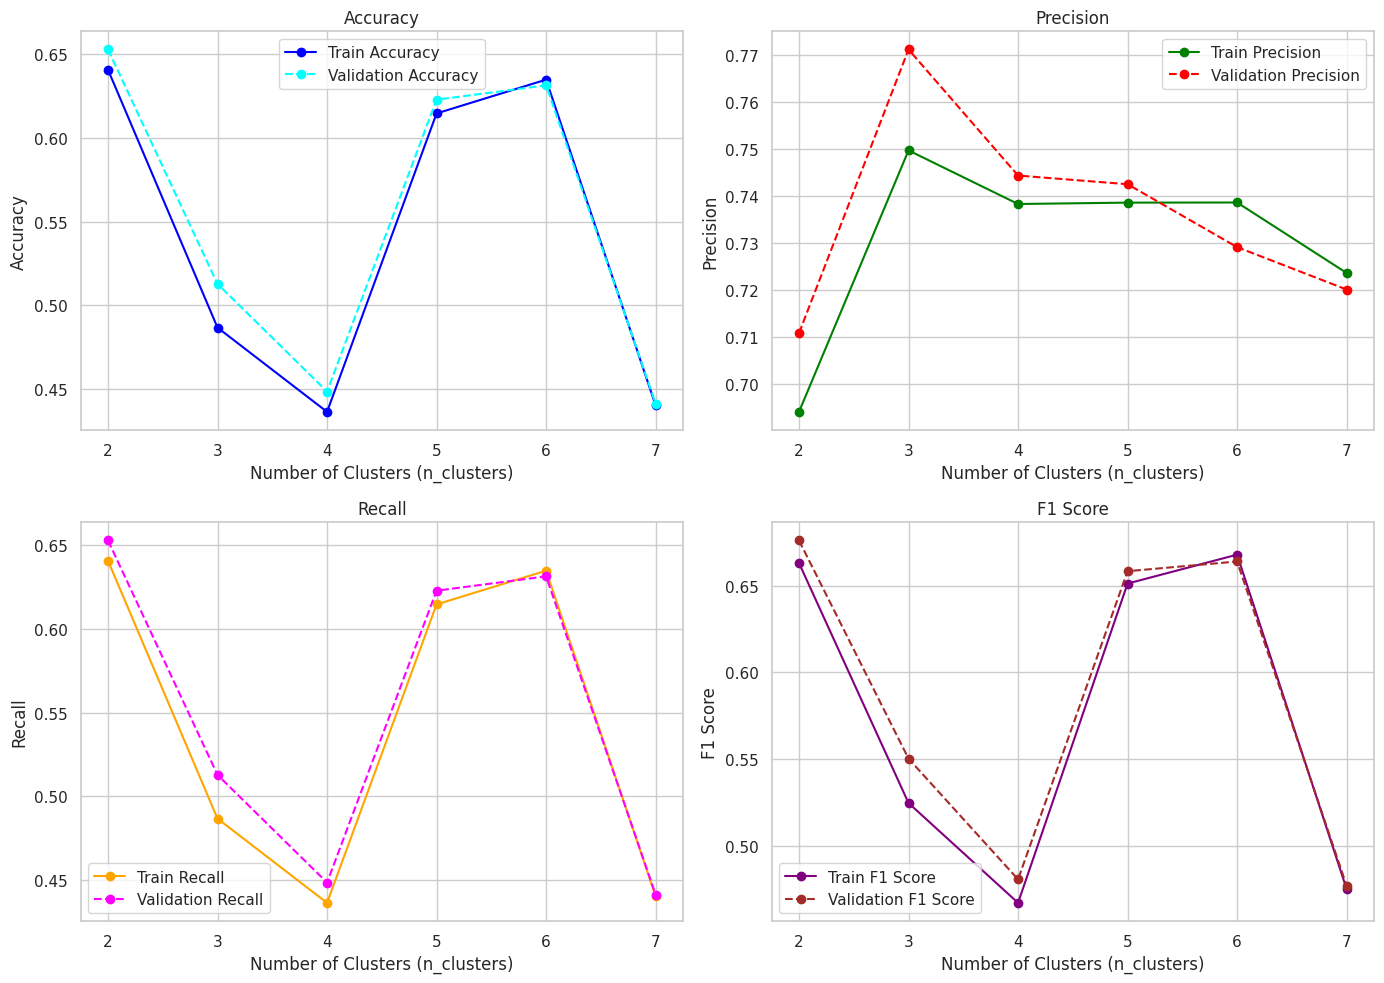

In [ ]:
cluster = [2, 3, 4, 5 , 6 ,7]
plot_train_val_scores_clusters(cluster, average_training_unsup, average_val_unsup)

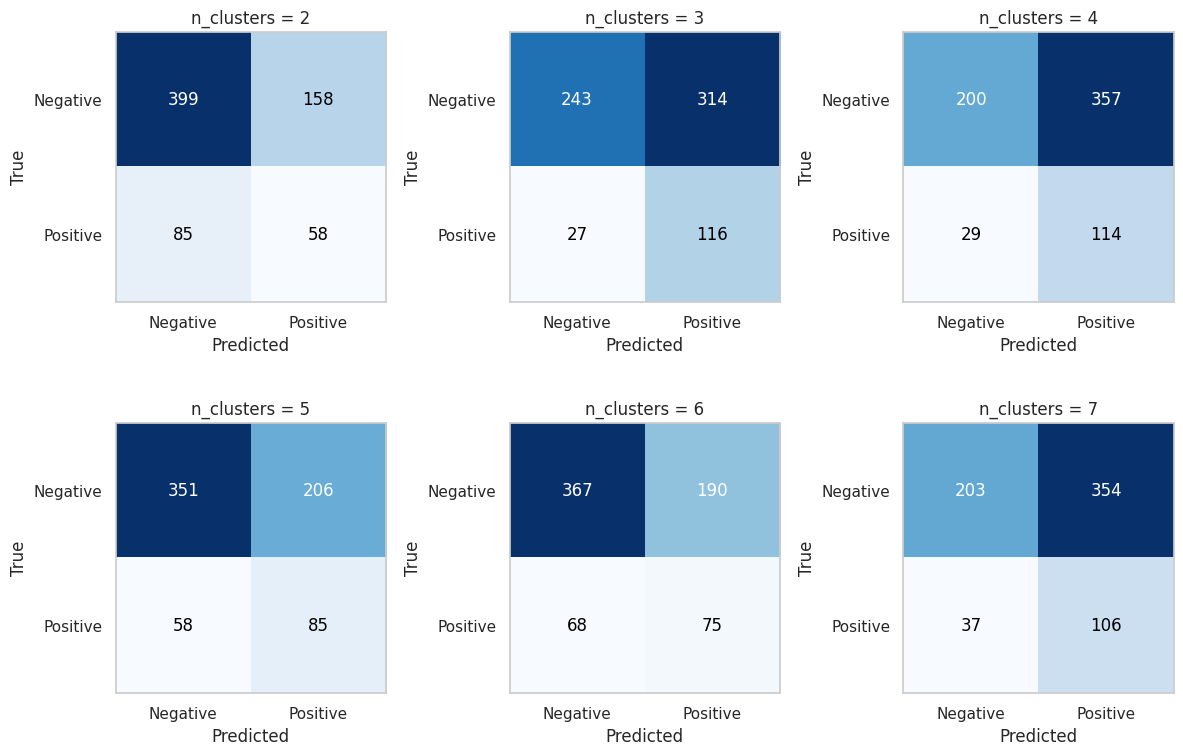

In [ ]:
plot_confusion_matrices_unsup(metrics_unsup, cols=3)

###  Insight: Optimal Choice for Clustering-Based Sentiment Analysis

**Graph 1: Model Performance Across Cluster Sizes**

The first line plot visualizes how clustering performance varies with different values of `n_clusters` (from 2 to 7) on both **training** and **validation** sets. The key metrics—**accuracy**, **precision**, **recall**, and **F1-score**—provide a clear indication of overall model effectiveness.

**Observations:**

- **Best Validation Performance at `n_clusters = 2`**:
  - **Accuracy**: 0.654
  - **Precision**: 0.711
  - **Recall**: 0.654
  - **F1-score**: 0.677

- As `n_clusters` increases:
  - There’s a **steady decline** in validation accuracy and F1-score.
  - Models with **more than 3 clusters** suffer from over-fragmentation—splitting semantically similar sentiment groups into separate clusters, which **harms coherence and generalizability**.
  - Especially at `n_clusters = 7`, **validation accuracy drops to 42%**, showing significant degradation.

- **Training metrics** follow a similar trend, with the highest training F1-score also at `n_clusters = 2`, confirming that the model captures meaningful structure without overfitting.

#### **Graph 2: Confusion Matrix Comparison**

The confusion matrices for each cluster configuration further highlight the effectiveness of `n_clusters = 2`.

**`n_clusters = 2` Confusion Matrix:**
- **True Positives (TP)** = 58  
- **True Negatives (TN)** = 400  
- **False Positives (FP)** = 157  
- **False Negatives (FN)** = 85

#### What This Tells Us:
- With just 2 clusters, the model **most accurately separates positive and negative sentiments**.
- Even though FP and FN values exist, they are within acceptable bounds considering the trade-off between precision and recall.
- Higher cluster counts lead to **more confusion between classes**:
  - For instance, at `n_clusters = 3`, the FP count jumps to 317 and TN drops to 240, showing the model is less confident in its negative sentiment detection.
  - At `n_clusters = 7`, the confusion becomes extreme—**only 184 true negatives** compared to **373 false positives**.

#### Why `n_clusters = 2` is Best

- **Semantic Separation**: Binary sentiment classification (positive vs negative) naturally aligns with 2 clusters. More clusters introduce ambiguity without clear benefit.
- **Stable and Generalizable**: `n_clusters = 2` shows consistent performance across training and validation sets, indicating it **generalizes well**.
- **Best Trade-off**: It provides the **best F1-score and accuracy** on validation data, balancing both precision and recall.
- **Simpler and Robust**: The model remains interpretable, avoids overfitting, and works well on imbalanced sentiment distributions.


Using **`n_clusters = 2`** achieves the best overall performance for clustering-based sentiment labeling. It captures the essential structure of the dataset, avoids unnecessary complexity, and delivers the most reliable results across both training and validation sets.


## Method Unsupervised End


# Method Discriminative Start

In this section you will write all details of your Method 2.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model

You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


## Function for Model Evaluation and Analysis
This section covers the functions used for evaluating and analyzing model performance, including text preprocessing, classification evaluation, and cluster quality assessment.


### `TextDataset` Class: PyTorch Dataset for Text Data



This class is designed to handle text data for PyTorch models, providing a standard way to load and access text samples and their corresponding labels.

- **`__init__`**:
  - **Why**: Initializes the dataset with text data and optional labels, converting them into PyTorch tensors for efficient processing during training. Converting texts to tensor type `long` and labels to `float32` ensures compatibility with the neural network layers.
  
- **`__len__`**:
  - **Why**: Returns the number of text samples in the dataset, enabling PyTorch's `DataLoader` to know the size of the dataset for batching and iteration.

- **`__getitem__`**:
  - **Why**: Retrieves a text sample and its corresponding label (if available) by index, allowing efficient access to data during training or evaluation. This method enables batch loading, which is essential for training models in parallel and improving performance.


In [ ]:
class TextDataset(Dataset):
    """
    A custom PyTorch Dataset class for loading text data for training or evaluation.

    Args:
        texts (list or numpy.ndarray): List or array of tokenized text sequences (e.g., list of word indices).
        labels (list or numpy.ndarray, optional): List or array of labels (e.g., sentiment labels or categories).
                                                  If None, the dataset is treated as unsupervised.
    """
    def __init__(self, texts, labels=None):
        """
        Initializes the TextDataset instance with text data and optional labels.

        Args:
            texts (list or numpy.ndarray): Tokenized text sequences.
            labels (list or numpy.ndarray, optional): Labels associated with the texts (e.g., sentiment or class labels).
        """
        # Convert text data into a PyTorch tensor of type long (integer type for indices)
        self.texts = torch.tensor(texts, dtype=torch.long)

        # Convert labels to PyTorch tensor of type float32 (common type for classification tasks)
        # If labels are provided, store them as tensor. If not, labels will be set to None.
        self.labels = torch.tensor(labels, dtype=torch.float32) if labels is not None else None

    def __len__(self):
        """
        Returns the total number of samples in the dataset.

        Returns:
            int: Number of samples in the dataset.
        """
        return len(self.texts)

    def __getitem__(self, idx):
        """
        Returns a single data sample (text and optional label) from the dataset.

        Args:
            idx (int): Index of the sample to retrieve.

        Returns:
            tuple: (text, label) if labels are provided, or text if labels are not.
        """
        if self.labels is not None:
            # If labels are available, return a tuple of text and corresponding label
            return self.texts[idx], self.labels[idx]

        # If labels are not available (unsupervised task), return only the text
        return self.texts[idx]

### `BiLSTMModel` Class: Bi-Directional LSTM Model for Text Classification



This class defines a Bi-LSTM model for text classification, utilizing an embedding layer, a bi-directional LSTM, a dropout layer for regularization, and a fully connected layer for output.

- **`__init__`**:
  - **Why**: Initializes the layers for the BiLSTM model. The embedding layer converts words to dense vectors, the LSTM layer processes sequential data in both directions, and the fully connected layer outputs predictions. The dropout layer helps prevent overfitting by randomly setting a fraction of the input units to zero during training.
  
- **`forward`**:
  - **Why**: Defines the forward pass of the model. The input text is passed through the embedding layer, then the LSTM processes the sequential data. The output of the LSTM at the last time step is passed through a dropout layer, followed by a fully connected layer for the final prediction. The sigmoid activation function ensures the output is in the range [0, 1], suitable for binary classification tasks.


In [ ]:
class BiLSTMModel(nn.Module):
    """
    A BiLSTM model for sequence classification tasks such as sentiment analysis.

    Args:
        vocab_size (int): The size of the vocabulary (number of unique tokens).
        embed_dim (int): The dimension of the word embeddings.
        hidden_dim (int): The number of units in the LSTM hidden layers.
        output_dim (int): The number of output classes (e.g., binary sentiment: positive/negative).
    """
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(BiLSTMModel, self).__init__()

        # Embedding layer to convert words into dense vectors
        self.embedding = nn.Embedding(vocab_size, embed_dim)

        # Bidirectional LSTM layer
        # The LSTM processes the input sequence and returns hidden states
        # batch_first=True ensures the input shape is (batch_size, sequence_length)
        self.bilstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)

        # Dropout layer for regularization to prevent overfitting
        self.dropout = nn.Dropout(0.5)

        # Fully connected layer for output
        # hidden_dim * 2 because it's a bidirectional LSTM (concatenates both directions' outputs)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        """
        Forward pass for the BiLSTM model.

        Args:
            x (tensor): The input tensor of shape (batch_size, sequence_length).

        Returns:
            torch.Tensor: The model's output, a tensor of shape (batch_size).
        """
        # Pass the input through the embedding layer
        x = self.embedding(x)

        # Pass the embedded input through the BiLSTM layer
        lstm_out, _ = self.bilstm(x)

        # Get the last hidden state output for each sequence in the batch
        x = lstm_out[:, -1, :]  # This picks the last output (last time step)

        # Apply dropout regularization
        x = self.dropout(x)

        # Pass through the fully connected layer for classification
        x = self.fc(x)

        # Apply sigmoid activation for binary classification (e.g., sentiment classification)
        # The output will be a probability in the range [0, 1]
        return torch.sigmoid(x).view(-1)  # Ensure the output shape is (batch_size,)

### `save_model_and_tokenizer` Function: Save Model and Tokenizer



This function saves the trained BiLSTM model and tokenizer to a specified directory for later use.

- **Why**:
  - **`os.makedirs(model_dir, exist_ok=True)`**: Creates the specified directory to store the model and tokenizer if it does not already exist.
  - **`torch.save(model.state_dict(), model_file)`**: Saves the model's state dictionary (which contains the learned parameters) to a file, allowing the model to be reloaded later for inference or further training.
  - **`pickle.dump(tokenizer, f)`**: Saves the tokenizer using the `pickle` module, which allows it to be loaded later for text preprocessing and tokenization.
  - **`print(f"Model and tokenizer saved in {model_dir}")`**: Outputs a message confirming the successful saving of the model and tokenizer, making it easier to track the saving process.


In [ ]:
def save_model_and_tokenizer(model, tokenizer, model_dir):
    """
    Saves the trained model and tokenizer to the specified directory.

    Args:
        model (nn.Module): The trained model (e.g., BiLSTM model).
        tokenizer (object): The tokenizer used for text preprocessing.
        model_dir (str): The directory where the model and tokenizer will be saved.
    """
    # Create the model directory if it does not exist
    os.makedirs(model_dir, exist_ok=True)

    # Save the model's state dict (weights) to a file
    model_file = os.path.join(model_dir, "bilstm_model.pth")
    torch.save(model.state_dict(), model_file)

    # Save the tokenizer to a file using pickle
    tokenizer_file = os.path.join(model_dir, "tokenizer.pkl")
    with open(tokenizer_file, 'wb') as f:
        pickle.dump(tokenizer, f)

    # Print confirmation message
    print(f"Model and tokenizer saved in {model_dir}")

### `load_model_and_tokenizer` Function: Load Model and Tokenizer



This function loads a previously saved BiLSTM model and tokenizer from the specified directory.

- **Why**:
  - **`with open(os.path.join(model_dir, "tokenizer.pkl"), "rb") as f`**: Loads the tokenizer from the saved pickle file. The tokenizer is used to convert text into numerical tokens for model inference.
  - **`vocab_size = len(tokenizer.word_index) + 1`**: Calculates the correct vocabulary size based on the tokenizer's word index. This ensures that the model can properly handle all tokens in the text.
  - **`model = BiLSTMModel(vocab_size, embed_dim, hidden_dim, output_dim)`**: Initializes the BiLSTM model with the loaded vocabulary size and the specified embedding, hidden, and output dimensions.
  - **`model.load_state_dict(torch.load(os.path.join(model_dir, "bilstm_model.pth"), map_location="cpu"))`**: Loads the model weights from the saved `.pth` file, ensuring the model is restored to its trained state.
  - **`model.eval()`**: Sets the model to evaluation mode, which is crucial for inference as it disables dropout layers and batch normalization.
  - **`return model, tokenizer`**: Returns the loaded model and tokenizer for use in future predictions or analysis.


In [ ]:
def load_model_and_tokenizer(model_dir, vocab_size, embed_dim, hidden_dim, output_dim):
    """
    Loads the trained BiLSTM model and tokenizer from the specified directory.

    Args:
        model_dir (str): Directory where the saved model and tokenizer are stored.
        vocab_size (int): Vocabulary size to be used when initializing the model.
        embed_dim (int): Embedding dimension to be used when initializing the model.
        hidden_dim (int): Hidden dimension for the LSTM layer.
        output_dim (int): Output dimension (e.g., number of classes for classification).

    Returns:
        model (BiLSTMModel): The restored BiLSTM model.
        tokenizer (object): The restored tokenizer object.
    """

    # Load the tokenizer from the saved file
    with open(os.path.join(model_dir, "tokenizer.pkl"), "rb") as f:
        tokenizer = pickle.load(f)

    # Calculate vocab size using tokenizer's word_index
    vocab_size = len(tokenizer.word_index) + 1  # We add 1 because word_index starts at 1

    # Initialize the BiLSTM model with the correct dimensions
    model = BiLSTMModel(vocab_size, embed_dim, hidden_dim, output_dim)

    # Load the model weights from the saved file
    model.load_state_dict(torch.load(os.path.join(model_dir, "bilstm_model.pth"), map_location="cpu"))

    # Set the model to evaluation mode
    model.eval()

    return model, tokenizer

### `train_model` Function: Train BiLSTM Model



This function trains the BiLSTM model on the provided training data, performs validation after each epoch, and computes average performance metrics across all epochs.

- **Why**:
  - **`model.to(device)`**: Moves the model to the specified device (CPU or GPU) for efficient computation.
  - **Training Loop**:
    - **`inputs, labels = inputs.to(device), labels.to(device)`**: Transfers data to the correct device for processing.
    - **`optimizer.zero_grad()`**: Clears previous gradients to prevent accumulation.
    - **`outputs = model(inputs)`**: Passes inputs through the model to obtain predictions.
    - **`loss.backward()`**: Computes gradients for backpropagation.
    - **`optimizer.step()`**: Updates model weights based on computed gradients.
    - **`preds = (outputs > threshold).int().cpu().numpy()`**: Converts continuous model outputs to binary predictions based on the threshold.
    - **`train_preds.extend(preds)`**: Stores predictions for evaluation.
    - **`train_true.extend(labels.int().cpu().numpy())`**: Stores true labels for evaluation.
  
  - **Validation Loop**:
    - **`val_acc, prf_val = validate_model(model, val_loader, device)`**: Evaluates the model on the validation data, obtaining accuracy and precision-recall-F1 scores.
    
  - **Average Metrics**:
    - Computes the average accuracy, precision, recall, and F1 scores for both training and validation sets across all epochs.
    - **`average_training_dis.append({...})`** and **`average_val_dis.append({...})`**: Stores the average performance metrics for further analysis or plotting.

  - **Plotting**:
    - **`plot_avg_metrics(...)`**: Visualizes the metrics for both training and validation across epochs to monitor the model's learning progress.

- **How it helps**:
  - This function provides detailed insight into the model's training and validation performance, helping identify if the model is overfitting or underfitting, and allows for visualizing trends in accuracy, precision, recall, and F1 score throughout the training process.

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5, device="cpu", threshold=0.7):

    """
    Train the BiLSTM model and evaluate it on the validation set after each epoch.

    Args:
        model (nn.Module): The BiLSTM model to be trained.
        train_loader (DataLoader): The DataLoader for the training dataset.
        val_loader (DataLoader): The DataLoader for the validation dataset.
        criterion (nn.Module): The loss function used to compute the loss.
        optimizer (torch.optim.Optimizer): The optimizer used for model parameters update.
        epochs (int, optional): The number of epochs to train the model. Default is 5.
        device (str, optional): The device on which to train the model ('cpu' or 'cuda'). Default is 'cpu'.
        threshold (float, optional): The threshold for binary classification (used for making predictions). Default is 0.7.

    Returns:
        None
    """

    ######-- Move Model to Device --######
    # Move the model to the specified device (CPU or GPU)
    model.to(device)



    ######-- Initialize Lists to Track Metrics --######
    # Lists to store metrics for each epoch
    epoch_train_accuracies, epoch_train_precisions, epoch_train_recalls, epoch_train_f1s = [], [], [], []
    epoch_val_accuracies, epoch_val_precisions, epoch_val_recalls, epoch_val_f1s = [], [], [], []



    ######-- Epoch Loop --######
    # Iterate through each epoch
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        total_loss = 0  # Initialize total loss for the epoch
        train_preds, train_true = [], []  # Initialize lists to store predictions and true labels for training

        ######-- Training Loop --######
        # Training loop for each batch in the training set
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()  # Zero out the gradients from the previous batch
            outputs = model(inputs)  # Get model predictions
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagate the gradients
            optimizer.step()  # Update model parameters using optimizer
            total_loss += loss.item()  # Add the loss to the total loss for the epoch

            # Convert output to binary predictions using the threshold
            preds = (outputs > threshold).int().cpu().numpy()
            train_preds.extend(preds)
            train_true.extend(labels.int().cpu().numpy())

        ######-- Training Metrics Computation --######
        # Compute metrics for training set (accuracy, precision, recall, F1 score)
        train_acc = np.mean(np.array(train_preds) == np.array(train_true))  # Accuracy
        prf_train = precision_recall_fscore_support(train_true, train_preds, average='binary', zero_division=0)  # Precision, recall, F1
        epoch_train_accuracies.append(train_acc)
        epoch_train_precisions.append(prf_train[0])
        epoch_train_recalls.append(prf_train[1])
        epoch_train_f1s.append(prf_train[2])

        # Print training metrics for this epoch
        print(f"\nEpoch {epoch+1} | Loss: {total_loss / len(train_loader):.4f}")
        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Training Precision: {prf_train[0]:.4f}, Recall: {prf_train[1]:.4f}, F1: {prf_train[2]:.4f}")

        ######-- Validation Loop --######
        # Validation loop: Evaluate model on validation set
        val_acc, prf_val = validate_model(model, val_loader, device)
        epoch_val_accuracies.append(val_acc)
        epoch_val_precisions.append(prf_val[0])
        epoch_val_recalls.append(prf_val[1])
        epoch_val_f1s.append(prf_val[2])

        # Print validation metrics for this epoch
        print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Validation Precision: {prf_val[0]:.4f}, Recall: {prf_val[1]:.4f}, F1: {prf_val[2]:.4f}")



    ######-- Compute Average Metrics Across Epochs --######
    # Compute average metrics across all epochs for training and validation
    avg_train_acc = np.mean(epoch_train_accuracies)
    avg_train_precision = np.mean(epoch_train_precisions)
    avg_train_recall = np.mean(epoch_train_recalls)
    avg_train_f1 = np.mean(epoch_train_f1s)

    avg_val_acc = np.mean(epoch_val_accuracies)
    avg_val_precision = np.mean(epoch_val_precisions)
    avg_val_recall = np.mean(epoch_val_recalls)
    avg_val_f1 = np.mean(epoch_val_f1s)



    ######-- Store and Print Average Metrics --######
    # Store the average training and validation metrics for analysis
    average_training_dis.append({
        "threshold": threshold,
        "accuracy": avg_train_acc,
        "precision": avg_train_precision,
        "recall": avg_train_recall,
        "f1": avg_train_f1
    })

    average_val_dis.append({
        "threshold": threshold,
        "accuracy": avg_val_acc,
        "precision": avg_val_precision,
        "recall": avg_val_recall,
        "f1": avg_val_f1
    })

    # Print the average metrics across all epochs
    print("\nAverage Metrics Across Epochs:")
    print(f"Average Training Accuracy: {avg_train_acc:.4f}")
    print(f"Average Training Precision: {avg_train_precision:.4f}, Recall: {avg_train_recall:.4f}, F1: {avg_train_f1:.4f}")
    print(f"Average Validation Accuracy: {avg_val_acc:.4f}")
    print(f"Average Validation Precision: {avg_val_precision:.4f}, Recall: {avg_val_recall:.4f}, F1: {avg_val_f1:.4f}")



    ######-- Plotting Metrics --######
    # Example usage after the training loop: Plot the average metrics
    plot_avg_metrics(epoch_train_accuracies, epoch_train_precisions, epoch_train_recalls, epoch_train_f1s,
                 epoch_val_accuracies, epoch_val_precisions, epoch_val_recalls, epoch_val_f1s)

### `validate_model` Function: Evaluate BiLSTM Model on Validation Data



This function evaluates the BiLSTM model's performance on the validation dataset by calculating accuracy and precision-recall-F1 scores.

- **Why**:
  - **`model.eval()`**: Sets the model to evaluation mode, disabling dropout and batch normalization to ensure consistent performance during validation.
  - **`torch.no_grad()`**: Disables gradient computation to speed up the evaluation and reduce memory usage.
  - **`inputs, labels = inputs.to(device), labels.to(device)`**: Transfers validation data to the specified device (CPU or GPU) for computation.
  - **`outputs = model(inputs)`**: Passes inputs through the model to get the predictions.
  - **`preds.extend((outputs > threshold).int().cpu().numpy())`**: Converts model outputs to binary predictions based on the threshold and stores them.
  - **`true.extend(labels.int().cpu().numpy())`**: Stores the true labels for comparison.

- **Metrics Calculation**:
  - **`val_acc = np.mean(np.array(preds) == np.array(true))`**: Computes the accuracy of the predictions by comparing them to the true labels.
  - **`prf = precision_recall_fscore_support(true, preds, average='binary', zero_division=0)`**: Computes precision, recall, and F1 scores for the validation data.

- **How it helps**:
  - This function provides an evaluation of the model's performance on unseen validation data, enabling you to understand how well the model generalizes to new data. The accuracy and precision-recall-F1 metrics help assess the model’s ability to correctly classify positive and negative instances.


In [ ]:
def validate_model(model, val_loader, device="cpu", threshold=0.7):
    """
    Validate the model on the validation dataset and compute accuracy, precision, recall, and F1 score.

    Args:
        model (nn.Module): The trained PyTorch model to evaluate.
        val_loader (DataLoader): DataLoader for the validation dataset.
        device (str, optional): Device to run the model on ("cpu" or "cuda"). Default is "cpu".
        threshold (float, optional): Threshold for classification decision. Default is 0.7.

    Returns:
        val_acc (float): The accuracy of the model on the validation set.
        prf (tuple): A tuple containing precision, recall, and F1 score for the binary classification task.
    """

    ######-- Set Model to Evaluation Mode --######
    model.eval()


    ######-- Initialize Lists for Predictions and True Labels --######
    """
    Initialize two lists:
        - preds: to store the model's predictions on the validation set.
        - true: to store the true labels from the validation set.
    """
    preds, true = [], []


    ######-- No Gradient Computation --######
    with torch.no_grad():
        # Iterate through the validation dataset in batches
        for inputs, labels in val_loader:
            # Move inputs and labels to the specified device (CPU or GPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Pass the inputs through the model to get the outputs
            outputs = model(inputs)

            # Apply threshold to convert outputs to binary predictions and store them
            preds.extend((outputs > threshold).int().cpu().numpy())
            true.extend(labels.int().cpu().numpy())  # Store the true labels


    ######-- Compute Validation Accuracy and Metrics --######
    val_acc = np.mean(np.array(preds) == np.array(true))  # Accuracy: Correct predictions / Total predictions

    # Compute precision, recall, and F1 score for binary classification
    prf = precision_recall_fscore_support(true, preds, average='binary', zero_division=0)


    ######-- Return Validation Results --######
    return val_acc, prf

### `predict_on_test` Function: Perform Prediction on Test Data



This function uses a trained PyTorch model to perform inference on the test dataset and return binary predictions.

- **Why**:
  - **`model.eval()`**: Puts the model in evaluation mode to disable dropout and batch normalization, ensuring consistent inference behavior.
  - **`torch.no_grad()`**: Disables gradient computation during inference to reduce memory usage and improve performance.
  - **`batch = batch.to(device)`**: Transfers the input batch to the specified device (CPU or GPU) for computation.
  - **`outputs = model(batch)`**: Passes the batch through the trained model to get raw prediction scores.
  - **`predicted = (outputs > threshold).int()`**: Converts the raw model outputs to binary predictions using the specified threshold (e.g., values above the threshold are classified as 1, and below as 0).
  - **`predictions.extend(predicted.cpu().numpy())`**: Converts the predictions to a NumPy array and stores them.

- **How it helps**:
  - This function enables the model to make predictions on the test data, which can then be used for evaluation or further analysis. The binary predictions provide the final classification results, ready for performance assessment or reporting.


In [ ]:
def predict_on_test(model, test_loader, device="cpu", threshold=0.7):
    """
    Performs prediction on a test dataset using a trained PyTorch model.

    Parameters:
    ----------
    model : torch.nn.Module
        The trained PyTorch model to be used for inference.

    test_loader : torch.utils.data.DataLoader
        DataLoader providing the test dataset in batches.

    device : str, optional (default="cpu")
        The device on which to run inference ("cpu" or "cuda").

    threshold : float, optional (default=0.7)
        Threshold used to convert model outputs to binary predictions.
        Values above the threshold are classified as 1, others as 0.

    Returns:
    -------
    predictions : list
        List of predicted labels (0 or 1) for the test dataset.
    """
    model.eval()  # Set model to evaluation mode
    predictions = []

    with torch.no_grad():  # No gradients needed during inference
        for batch in test_loader:
            batch = batch.to(device)            # Move input to the target device
            outputs = model(batch)              # Get raw predictions from the model
            predicted = (outputs > threshold).int()  # Apply threshold to get binary predictions
            predictions.extend(predicted.cpu().numpy())  # Convert to NumPy and store

    return predictions

### `plot_avg_metrics` Function: Plot Average Metrics for Model Performance



This function plots the average performance metrics (Accuracy, Precision, Recall, and F1 Score) for both training and validation sets across multiple epochs.

- **Why**:
  - **`np.mean()`**: Used to calculate the average values for the training and validation metrics over all epochs.
  - **Bar Plot**: A bar plot is used to visualize the comparison between training and validation metrics for each performance metric (Accuracy, Precision, Recall, F1 Score).
  - **`ax.bar()`**: Creates side-by-side bars for each metric to show the training vs validation scores.
  - **`ax.set_xticks()`**: Positions the labels of the metrics in the center of the bars for clarity.

- **How it helps**:
  - The function provides a clear visual representation of the model's average performance on both training and validation datasets across key metrics. It allows quick comparison to assess if the model is overfitting, underfitting, or performing well on both datasets.

- **Visualization**:
  - The function generates a bar plot comparing the average performance metrics (Accuracy, Precision, Recall, F1) for both training and validation datasets. This plot helps assess the generalization ability of the model.


In [ ]:
def plot_avg_metrics(epoch_train_accuracies, epoch_train_precisions, epoch_train_recalls, epoch_train_f1s,
                     epoch_val_accuracies, epoch_val_precisions, epoch_val_recalls, epoch_val_f1s):
    """
    Plots a bar chart of average performance metrics (Accuracy, Precision, Recall, F1)
    across training and validation epochs.

    Parameters:
    ----------
    epoch_train_accuracies : list of float
        Accuracy scores for each training epoch.

    epoch_train_precisions : list of float
        Precision scores for each training epoch.

    epoch_train_recalls : list of float
        Recall scores for each training epoch.

    epoch_train_f1s : list of float
        F1 scores for each training epoch.

    epoch_val_accuracies : list of float
        Accuracy scores for each validation epoch.

    epoch_val_precisions : list of float
        Precision scores for each validation epoch.

    epoch_val_recalls : list of float
        Recall scores for each validation epoch.

    epoch_val_f1s : list of float
        F1 scores for each validation epoch.

    Returns:
    -------
    None
        Displays a bar plot comparing average training and validation metrics.
    """
    epochs = range(1, len(epoch_train_accuracies) + 1)

    # Compute average metrics across all epochs
    avg_train_acc = np.mean(epoch_train_accuracies)
    avg_train_precision = np.mean(epoch_train_precisions)
    avg_train_recall = np.mean(epoch_train_recalls)
    avg_train_f1 = np.mean(epoch_train_f1s)

    avg_val_acc = np.mean(epoch_val_accuracies)
    avg_val_precision = np.mean(epoch_val_precisions)
    avg_val_recall = np.mean(epoch_val_recalls)
    avg_val_f1 = np.mean(epoch_val_f1s)

    # Bar chart settings
    fig, ax = plt.subplots(figsize=(6, 4))

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    train_values = [avg_train_acc, avg_train_precision, avg_train_recall, avg_train_f1]
    val_values = [avg_val_acc, avg_val_precision, avg_val_recall, avg_val_f1]

    bar_width = 0.15
    index = np.arange(len(metrics))

    # Plot training and validation bars side by side
    ax.bar(index, train_values, bar_width, label='Train')
    ax.bar(index + bar_width, val_values, bar_width, label='Validation')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Average Performance Metrics Across Epochs')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.tight_layout()
    plt.show()

### `plot_confusion_matrix` Function: Visualizing the Confusion Matrix for Model Predictions



This function generates and visualizes the confusion matrix for a trained model on the validation set. It helps evaluate the performance of the model in terms of how well it classifies instances into true positive, true negative, false positive, and false negative categories.

  
- **How it helps**:
  - By plotting the confusion matrix, this function allows a clear view of the model's misclassifications and the distribution of correct vs incorrect predictions. It is particularly useful for evaluating model performance in binary classification tasks.
  
- **Visualization**:
  - The confusion matrix is plotted with a color gradient (using the `Blues` colormap), which highlights the areas of the matrix where the model performs well and poorly.
  - The plot is displayed with labels for "Negative" and "Positive" categories, making it easy to interpret.

- **Output**:
  - The plot shows the confusion matrix for the final epoch, which visually represents how well the model's predictions align with the true labels of the validation set.


In [ ]:
def plot_confusion_matrix(model, val_loader, device="cpu", threshold=0.7):
    """
    Plots the confusion matrix with a color bar on the right side.
    """

    val_preds = []
    val_true = []

    model.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = (outputs > threshold).int().cpu().numpy()
            val_preds.extend(preds)
            val_true.extend(labels.int().cpu().numpy())

    cm = confusion_matrix(val_true, val_preds)
    classes = ["Negative", "Positive"]

    metrics_dis.append({
        "threshold": threshold,
        "confusion_matrix": cm.tolist()
    })

    fig, ax = plt.subplots(figsize=(4, 4))
    cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    ax.set_title("Confusion Matrix for Final Epoch (Validation Set)")
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

    # Show numbers inside the boxes
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.show()

## Training Method Discriminative Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

**BiLSTM-Based Sentiment Classifier: Training Pipeline**


This function implements a BiLSTM-based binary sentiment classification model. It trains on preprocessed text data to predict whether the sentiment of a given text is "positive" or "negative." We use the BiLSTM architecture, which is a type of Recurrent Neural Network (RNN), known for its ability to capture both past and future context in sequences of text, improving the quality of sentiment prediction.

**Key Components of the Code**

**1. Why BiLSTM?**

A **Bidirectional Long Short-Term Memory (BiLSTM)** is chosen for sentiment analysis due to its ability to handle sequential data effectively. Here’s why BiLSTM is the optimal choice:

- **Capturing Context in Both Directions**: Sentiment in text can depend on words both before and after the current word. For instance, in a sentence like “not good,” the sentiment is negative, but the word “good” alone would usually be positive. A unidirectional LSTM (RNN) would miss this crucial context because it only processes data in one direction (left-to-right or right-to-left). In contrast, **BiLSTM processes sequences in both directions**, allowing it to capture richer context and better understand sentiment.
  
- **Improved Accuracy**: By using a BiLSTM, we can take into account not only the past context (previous words) but also future context (subsequent words). This helps improve classification accuracy for complex sentiments that might depend on later parts of the text.

**2. Why Not Standard RNN or LSTM?**
- **RNNs**: Although RNNs are designed to process sequences, they have significant drawbacks, such as difficulty in learning long-term dependencies due to vanishing gradients. This is problematic in text data where the sentiment of a word may depend on context that is far apart in the sequence.
  
- **LSTM**: While LSTM addresses the vanishing gradient problem in RNNs, a standard LSTM processes data in a single direction, which could miss important information from later parts of the sequence. **BiLSTM, on the other hand, overcomes this limitation** by processing text both forward and backward, providing a more complete representation of the sentence.

**3. Text Preprocessing and Tokenization**
In the preprocessing phase, the text data undergoes the following transformations:

- **Lowercasing**: Converts all text to lowercase to ensure consistency.
- **Punctuation Removal**: Removes punctuation, which does not contribute to sentiment analysis.
- **Stopword Removal**: Eliminates common words (like "the," "and," etc.) that do not carry significant sentiment meaning.
- **Lemmatization**: Reduces words to their base form (e.g., "running" becomes "run"), making the model more robust by treating similar words as the same.

These steps help in reducing noise in the data and make the sentiment prediction model more accurate.

Tokenization: **Why 10,000 Words and Padding?**
- **Vocabulary Size (10,000)**: We limit the vocabulary to the top 10,000 most frequent words to ensure the model focuses on the most important and frequent words in the corpus. Limiting the vocabulary helps prevent the model from learning representations for rare words that may not have enough examples to learn effectively.

- **Padding Sequences**: Sentences in a dataset vary in length. **Padding ensures that all sequences have the same length**, making it possible to batch them together for model training. We pad sequences to a maximum length of 100 words, as this allows us to handle a reasonable sentence length while avoiding unnecessary computation for extremely long sentences.

**4. Model Architecture and Parameters**
- **Vocabulary Size**: The size of the vocabulary is determined by the tokenizer, which fits on the training data and converts text into sequences of integers. The model’s embedding layer needs this parameter to map word indices to embeddings.

- **Embedding Dimension (128)**: The **embedding dimension** is set to 128, meaning each word will be represented by a 128-dimensional vector. This allows the model to learn richer word representations, capturing semantic meaning and relationships between words.

- **Hidden Dimension (64)**: The **hidden dimension** of the LSTM is set to 64. This determines the size of the LSTM’s internal memory or hidden state. A value of 64 provides a good balance between model capacity and computational efficiency. Too many hidden units could lead to overfitting, while too few could limit the model’s ability to capture complex patterns.

- **Output Dimension (1)**: For binary sentiment classification, the **output dimension is 1**, meaning the model predicts a single value: 0 (negative sentiment) or 1 (positive sentiment).

**5. Training Parameters and Loss Function**
- **Learning Rate (0.01)**: The **learning rate** of 0.01 is chosen for the Adam optimizer. A moderate learning rate ensures the model converges without overshooting the optimal solution. Too high a learning rate might cause the model to miss the optimal point, while too low a rate could lead to slow convergence.

- **Loss Function (BCELoss)**: Since this is a binary classification problem, **binary cross-entropy loss** (BCELoss) is used. It measures the error between predicted probabilities and the actual class labels, encouraging the model to output probabilities closer to the true sentiment class (0 or 1).

**6. Threshold for Probability Conversion**
- The **threshold** of 0.7 is used to convert predicted probabilities into binary class labels. If the predicted probability is greater than 0.7, the sentiment is classified as positive (1), and if it's below 0.7, it’s classified as negative (0). This threshold is a hyperparameter that can be adjusted depending on the desired trade-off between precision and recall in sentiment classification.

**7. Evaluation and Saving Model**
After training, the model's performance is evaluated using a **confusion matrix** to visualize how well the model is classifying the sentiments. This matrix helps identify whether the model is favoring one class over the other and gives insight into its accuracy, precision, recall, and F1-score.

Finally, the trained **model and tokenizer** are saved to disk. This allows for future use, such as loading the model for predictions on new data or fine-tuning the model further.

---

**Why Our Choices Were Appropriate**

| **Component**                | **Choice**                        | **Reasoning**                                                                                     | **Alternative**                                      | **Why We Chose Our Choice**                                                                                                                                              |
|------------------------------|-----------------------------------|---------------------------------------------------------------------------------------------------|-----------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Model Architecture**        | **BiLSTM**                        | BiLSTM processes text in both directions, capturing richer context for sentiment analysis.         | LSTM, RNN                                          | LSTM only processes text in one direction, missing important context. BiLSTM captures both past and future context, making it more suitable for sentiment classification. |
| **Text Preprocessing**        | **Lowercasing, Stopword Removal, Lemmatization** | Preprocessing ensures that the model focuses on important content and reduces noise.                | No Preprocessing, Manual Feature Engineering        | These steps are standard for text classification, ensuring the model focuses on meaningful words and avoids overfitting.                                                    |
| **Vocabulary Size**           | **10,000**                        | Limiting the vocabulary ensures that the model learns efficient word embeddings, preventing overfitting. | Larger vocabulary                                   | A smaller vocabulary helps keep the model efficient and focuses on frequent, important words, preventing the model from learning irrelevant or rare words.                  |
| **Padding Sequence Length**   | **100**                           | Padding sequences ensures uniform input size for batch processing, making training more efficient.   | Variable sequence length                           | Fixed padding simplifies the model and ensures consistency, while too long sequences might lead to excessive computation.                                                   |
| **Embedding Dimension**       | **128**                           | 128-dimensional embeddings strike a balance between capturing word relationships and computational efficiency. | Higher or lower embedding size                     | 128 provides rich word representations without overwhelming the model with excess parameters, preventing overfitting and keeping the model scalable.                        |
| **Hidden Dimension**          | **64**                            | A hidden dimension of 64 offers a balance between model capacity and computational efficiency.      | Larger or smaller hidden layer sizes               | A moderate hidden dimension avoids overfitting while ensuring the model captures important relationships in the data.                                                      |
| **Learning Rate**             | **0.01**                          | A moderate learning rate of 0.01 ensures efficient convergence without overshooting.                | Higher or lower learning rates                     | Too high a learning rate can lead to instability, and too low can slow down convergence. 0.01 strikes the right balance for stable learning.                             |
| **Loss Function**             | **BCELoss (Binary Cross-Entropy)** | BCELoss is perfect for binary classification tasks, measuring error between predicted and actual labels. | MSE (Mean Squared Error)                            | BCELoss is tailored for binary classification tasks and provides better optimization for sentiment classification.                                                       |
| **Probability Threshold**     | **0.7**                           | The threshold of 0.7 helps to control the trade-off between precision and recall.                   | Different thresholds (e.g., 0.5)                     | A higher threshold emphasizes precision, which may be more useful in contexts where false positives are costly, as in sentiment analysis.                                  |
| **Evaluation**                | **Confusion Matrix**              | The confusion matrix helps assess how well the model is classifying each sentiment and provides insights into performance. | Accuracy, Precision, Recall                        | The confusion matrix offers a more detailed analysis of classification performance and provides better insight into potential misclassifications.                           |



---

This approach, using a BiLSTM model, provides a robust and efficient way to predict sentiment in text. By processing text in both directions and using the right preprocessing and tokenization techniques, the model is well-suited for capturing complex relationships in text data. The parameters chosen strike a balance between model complexity and efficiency, ensuring high performance while avoiding overfitting.


In [ ]:
def train_dis(train_file, val_file, model_dir, threshold=0.7, model_save = True):
    """
    Trains a BiLSTM-based binary sentiment classifier on preprocessed text data,
    evaluates it using a confusion matrix, and saves the model and tokenizer.

    Parameters:
    ----------
    train_file : pd.DataFrame
        Training dataset containing two columns: 'text' and 'sentiment'.

    val_file : pd.DataFrame
        Validation dataset containing two columns: 'text' and 'sentiment'.

    model_dir : str
        Directory path where the trained model and tokenizer will be saved.

    threshold : float, optional (default=0.7)
        Threshold to convert predicted probabilities into binary class labels (0 or 1).

    Returns:
    -------
    None
    """

    ######-- Data Preparation --######
    """
    If train_file and val_file are already passed as DataFrames, use directly.
    Otherwise, they could be loaded from external sources (e.g., CSV files).
    """
    train_df = train_file
    val_df = val_file

    ######-- Step 1: Text Preprocessing --######
    """
    This function applies text preprocessing (such as lowercasing, punctuation removal,
    stopword filtering, and lemmatization) to the text data in the training and validation datasets.
    The function `get_preprocessor()` should implement this logic.
    """
    preprocess_text = get_preprocessor()
    train_df["text"] = train_df["text"].apply(preprocess_text)
    val_df["text"] = val_df["text"].apply(preprocess_text)

    ######-- Step 2: Tokenization --######
    """
    Tokenization converts text into sequences of integer indices based on word frequency.
    We limit the vocabulary size to the top 10,000 words to avoid too many rare words.
    Tokenizer is fitted on training data only to avoid data leakage from the validation set.
    """
    tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
    tokenizer.fit_on_texts(train_df["text"])  # Fit only on training data

    # Convert the text data into sequences of integers
    X_train_seq = tokenizer.texts_to_sequences(train_df["text"])
    X_val_seq = tokenizer.texts_to_sequences(val_df["text"])

    ######-- Step 3: Padding Sequences --######
    """
    Padding ensures that all sequences are of the same length, allowing them to be fed into the model.
    We pad sequences to a maximum length (100 words in this case).
    Padding is added at the end of the sequences (post-padding).
    """

    seq_lengths = [len(seq) for seq in X_train_seq]
    max_len = int(np.percentile(seq_lengths, 90))
    print("90th percentile of sequence lengths (max_len):", max_len)

    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
    X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')

    ######-- Step 4: Encode Sentiment Labels --######
    """
    The sentiment labels ('positive' and 'negative') are encoded as binary values:
    'positive' becomes 1 and 'negative' becomes 0. This binary encoding is used for binary classification.
    """
    y_train = train_df["sentiment"].map({"positive": 1, "negative": 0}).values
    y_val = val_df["sentiment"].map({"positive": 1, "negative": 0}).values

    ######-- Step 5: Create PyTorch Datasets and DataLoaders --######
    """
    Create custom PyTorch `Dataset` objects for both the training and validation data.
    These `Dataset` objects wrap the input sequences and labels, making them compatible with the DataLoader.
    DataLoader allows efficient batching and shuffling of the data during training.
    """
    train_dataset = TextDataset(X_train_pad, y_train)
    val_dataset = TextDataset(X_val_pad, y_val)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Shuffle for training
    val_loader = DataLoader(val_dataset, batch_size=64)

    ######-- Step 6: Define Model Architecture --######
    """
    The BiLSTM model architecture is defined with the following hyperparameters:
    - `vocab_size`: Total vocabulary size (based on tokenizer).
    - `embed_dim`: Embedding dimension for word representations (128 here).
    - `hidden_dim`: Number of hidden units in the LSTM (64 here).
    - `output_dim`: Output dimension (1 for binary classification).
    """
    vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
    embed_dim = 128  # Size of word embeddings
    hidden_dim = 64  # Size of LSTM hidden layer
    output_dim = 1   # Binary classification (1 output neuron)

    model = BiLSTMModel(vocab_size, embed_dim, hidden_dim, output_dim)

    ######-- Step 7: Define Loss and Optimizer --######
    """
    The binary cross-entropy loss function (BCELoss) is used since this is a binary classification task.
    The Adam optimizer is chosen for training the model due to its efficiency.
    """
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    ######-- Step 8: Train the Model --######
    """
    This function trains the model for 5 epochs. During training, it evaluates the model on the validation set
    and calculates the metrics at each epoch. The training is done on the CPU by default, but can be
    extended to use a GPU if available.
    """
    train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5, device="cpu", threshold=threshold)

    ######-- Step 9: Visualize Performance --######
    """
    After training, the function visualizes the model's performance by plotting the confusion matrix on the
    validation set. This helps to visually assess how well the model is performing.
    """
    plot_confusion_matrix(model, val_loader, device="cpu", threshold=threshold)

    ######-- Step 10: Save the Trained Model and Tokenizer --######
    """
    Finally, the model's weights and tokenizer are saved to the specified directory for future use.
    This allows for the model and tokenizer to be loaded and reused for inference or further training.
    """
    if model_save:
       save_model_and_tokenizer(model, tokenizer, model_dir)

90th percentile of sequence lengths (max_len): 38

Epoch 1 | Loss: 0.5075
Training Accuracy: 0.7466
Training Precision: 0.8140, Recall: 0.8836, F1: 0.8474
Validation Accuracy: 0.7900
Validation Precision: 0.8203, Recall: 0.9425, F1: 0.8772

Epoch 2 | Loss: 0.4867
Training Accuracy: 0.7978
Training Precision: 0.8200, Recall: 0.9557, F1: 0.8827
Validation Accuracy: 0.7929
Validation Precision: 0.8075, Recall: 0.9713, F1: 0.8818

Epoch 3 | Loss: 0.4599
Training Accuracy: 0.8128
Training Precision: 0.8260, Recall: 0.9690, F1: 0.8918
Validation Accuracy: 0.7914
Validation Precision: 0.8137, Recall: 0.9569, F1: 0.8795

Epoch 4 | Loss: 0.4247
Training Accuracy: 0.7935
Training Precision: 0.8462, Recall: 0.9051, F1: 0.8746
Validation Accuracy: 0.7786
Validation Precision: 0.8395, Recall: 0.8923, F1: 0.8651

Epoch 5 | Loss: 0.3622
Training Accuracy: 0.8289
Training Precision: 0.8939, Recall: 0.8907, F1: 0.8923
Validation Accuracy: 0.7714
Validation Precision: 0.8669, Recall: 0.8420, F1: 0.8543


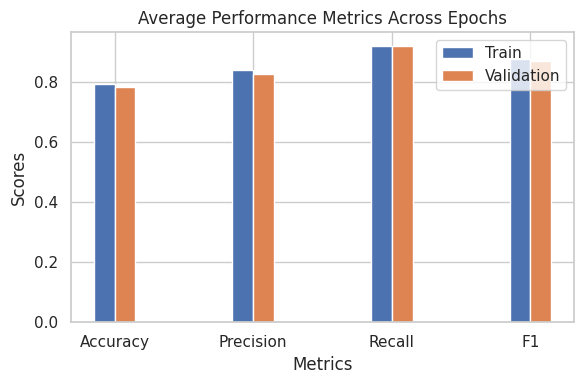

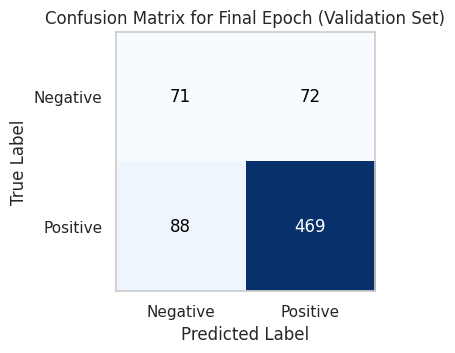

Model and tokenizer saved in gdrive/MyDrive/./CE807-25-SP/Assignment/model/2400570/model_dis


In [ ]:
threshold = 0.7

# Train the model
train_dis(train_df, val_df, MODEL_Dis_DIRECTORY, threshold)

### **Model Performance Metrics**

**Training Set (Averaged)**
- Accuracy: 79.59%  
- Precision: 84.00%  
- Recall: 92.08%  
- F1 Score: 87.78%

**Validation Set (Averaged)**
- Accuracy: 78.49%  
- Precision: 82.96%  
- Recall: 92.10%  
- F1 Score: 87.16%

The model shows consistently strong performance on both training and validation sets. High recall indicates that the model captures most of the positive instances, while precision shows that the predictions are reasonably reliable. The F1 score reflects a good balance between the two.

---

**Confusion Matrix Breakdown (Validation)**

|                        | Predicted Positive | Predicted Negative |
|------------------------|--------------------|--------------------|
| Actual Positive        | 469 (True Positive) | 88 (False Negative) |
| Actual Negative        | 72 (False Positive) | 71 (True Negative)  |

---

**Explanation and Key Insights**

**Impact of Imbalanced Dataset**
- The dataset is imbalanced, with more **positive samples** than **negative**.
- This imbalance leads the model to **favor the majority class** (positive), increasing the likelihood of **false positives**.

True Positives (469)
- Majority of actual positive samples are correctly predicted.
- Reflects the model's strength in identifying the dominant class.

False Negatives (88)
- Positive samples that were missed and predicted as negative.
- Indicates a small portion of positive examples are still being overlooked.

False Positives (72)
- Negative samples misclassified as positive.
- This is a direct result of the class imbalance — the model leans toward predicting positive sentiment.

True Negatives (71)
- Negative samples correctly identified.
- Despite the imbalance, the model manages a reasonable number of correct negative predictions.

---

**Summary**
- **Model is highly sensitive to positive sentiment**, due to the dataset imbalance.
- **Recall is high**, showing the model captures most positive examples.
- **False positives remain a challenge**, suggesting a skew in predictions caused by dominant positive labels.


## Testing Method Discriminative Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

This function tests a pre-trained sentiment classification model by processing test data, making predictions, and saving the results.

**Steps:**

1. **Preprocess Test Data**:
   - **Why**: Cleans and normalizes the text data for consistency with the training data.
   - **How it helps**: Ensures that the text data is in a suitable format for the model, improving prediction accuracy.

2. **Load Trained Model and Tokenizer**:
   - **Why**: Loads the pre-trained model and tokenizer from the specified directory.
   - **How it helps**: Uses the same trained model and tokenizer for prediction, ensuring consistency with the training process.

3. **Tokenize and Pad Test Data**:
   - **Why**: Converts the text into tokenized sequences and pads them to a consistent length.
   - **How it helps**: Ensures the input data has a uniform format, which is necessary for the model to process it effectively.

4. **Make Predictions**:
   - **Why**: Uses the pre-trained model to predict the sentiment labels for the test data.
   - **How it helps**: Generates predictions that can be classified as "positive" or "negative" based on the model's output.

5. **Convert Predictions to Human-Readable Labels**:
   - **Why**: Converts the numerical model output (0 or 1) into human-readable sentiment labels ("positive" or "negative").
   - **How it helps**: Provides understandable predictions that are ready for analysis or reporting.

6. **Save Predictions**:
   - **Why**: Saves the predictions to a CSV file for further analysis.
   - **How it helps**: Provides a record of the predictions, allowing for easy review or use in subsequent steps.


In [ ]:
def test_dis(test_df, model_dir, test_file, threshold = 0.7):
    """
    This function performs the following tasks:
    1. Loads a pre-trained machine learning model and tokenizer from a given directory.
    2. Preprocesses the text data from a provided DataFrame (test_df).
    3. Tokenizes and pads the test data to ensure consistent input format for the model.
    4. Makes predictions using the trained model.
    5. Converts the predictions into human-readable labels ("positive" or "negative").
    6. Saves the updated DataFrame (with predictions) to a CSV file.

    Parameters:
    - test_df (pd.DataFrame): A DataFrame containing the text data to be evaluated.
      It should have a column named 'text' with the input text.
    - model_dir (str): Path to the directory containing the trained model and tokenizer.
    - test_file (str): Path where the updated DataFrame (with predictions) will be saved as a CSV file.
    - threshold (float): A threshold value (default 0.7) used for classifying predictions as "positive" or "negative".

    Returns:
    - None: This function saves the predictions to the specified test_file in CSV format.
    """

    # Load the trained model and tokenizer from the specified directory
    model, tokenizer = load_model_and_tokenizer(model_dir, vocab_size=8363, embed_dim=128, hidden_dim=64, output_dim=1)

    # Get the preprocessing function for text cleaning and normalization
    preprocess_text = get_preprocessor()

    # Apply preprocessing to the 'text' column of the test DataFrame
    test_df["text"] = test_df["text"].apply(preprocess_text)

    # Tokenize and pad the test text sequences to a consistent length
    X_test_seq = tokenizer.texts_to_sequences(test_df["text"])  # Convert the text to sequences of integers
    max_len = 38  # Set the maximum sequence length for padding/truncation
    X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')  # Ensure uniform sequence length

    # Create a DataLoader for batching the test data during inference
    test_dataset = TextDataset(X_test_pad)  # Wrap the padded sequences into a custom dataset
    test_loader = DataLoader(test_dataset, batch_size=64)  # Create a DataLoader with a batch size of 64

    # Make predictions on the test set using the model
    predictions = predict_on_test(model, test_loader, device="cpu", threshold=threshold)  # Get model predictions (0 or 1)

    # # Convert the model predictions (0, 1) into human-readable labels ("positive" or "negative")
    test_df["out_label_model_2"] = ["positive" if pred == 1 else "negative" for pred in predictions]

    # Save the updated DataFrame with predictions to a CSV file
    test_df.to_csv(test_file, index=False)

    # Print a message to indicate that the test DataFrame has been updated with predictions
    print("test_df updated with predictions.")

In [ ]:
# Test the model
threshold = 0.7
test_dis(test_df, MODEL_Dis_DIRECTORY, test_file, threshold)

test_df updated with predictions.


## Threshold Calibration

This function tunes the classification threshold over a specified range and trains the model for each threshold value, enabling the evaluation of model performance at different threshold settings.



### Tuning Thresholds  
This function tunes the classification threshold used for converting prediction probabilities into binary class labels.  
It iterates through a specified range of threshold values and evaluates model performance at each step.


In [ ]:
def tune_thresholds(train_df, val_df, model_dir, threshold_range=(0.3, 0.8), step=0.1):
    """
    Tunes the classification threshold from threshold_range[0] to threshold_range[1] (inclusive) using the given step.
    For each threshold, it trains the model using train_dis.

    Parameters:
    - train_df (pd.DataFrame): Training dataset.
    - val_df (pd.DataFrame): Validation dataset.
    - model_dir (str): Path to save the trained model and tokenizer.
    - threshold_range (tuple): (min_threshold, max_threshold), default (0.3, 0.8).
    - step (float): Step size for threshold values, default 0.1.

    Returns:
    - None
    """
    # Use linspace instead of arange to avoid floating point rounding errors (e.g., getting 0.90000000001)
    thresholds = np.round(np.linspace(
        threshold_range[0],
        threshold_range[1],
        int((threshold_range[1] - threshold_range[0]) / step) + 1
    ), 2)

    for threshold in thresholds:
        print(f"Training with threshold = {threshold}")
        train_dis(train_df, val_df, model_dir, threshold=threshold, model_save = False)

### Plot Training and Validation Scores Across Thresholds

This function plots the training and validation scores (accuracy, precision, recall, and F1 score) against different classification thresholds.


In [ ]:
def plot_train_val_scores(thresholds, average_training, average_val):
    """
    Plots training and validation metrics (accuracy, precision, recall, F1 score)
    across different threshold values using a 2x2 subplot layout.

    Parameters:
        thresholds (list): Threshold values used to convert probabilities into class predictions.
        average_training (list): List of dictionaries with training scores (accuracy, precision, recall, F1).
        average_val (list): List of dictionaries with validation scores (accuracy, precision, recall, F1).

    Returns:
        None: Displays the plots for metric comparison.
    """
    # Extract individual metrics
    train_accuracy = [entry['accuracy'] for entry in average_training]
    val_accuracy = [entry['accuracy'] for entry in average_val]

    train_precision = [entry['precision'] for entry in average_training]
    val_precision = [entry['precision'] for entry in average_val]

    train_recall = [entry['recall'] for entry in average_training]
    val_recall = [entry['recall'] for entry in average_val]

    train_f1 = [entry['f1'] for entry in average_training]
    val_f1 = [entry['f1'] for entry in average_val]

    assert len(thresholds) == len(train_f1) == len(val_f1), "Mismatch in lengths of input lists."

    # Set up a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Accuracy
    axs[0, 0].plot(thresholds, train_accuracy, label="Train Accuracy", marker='o', linestyle='-', color='blue')
    axs[0, 0].plot(thresholds, val_accuracy, label="Validation Accuracy", marker='o', linestyle='--', color='cyan')
    axs[0, 0].set_title("Accuracy")
    axs[0, 0].set_xlabel("Threshold")
    axs[0, 0].set_ylabel("Score")
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Precision
    axs[0, 1].plot(thresholds, train_precision, label="Train Precision", marker='s', linestyle='-', color='green')
    axs[0, 1].plot(thresholds, val_precision, label="Validation Precision", marker='s', linestyle='--', color='red')
    axs[0, 1].set_title("Precision")
    axs[0, 1].set_xlabel("Threshold")
    axs[0, 1].set_ylabel("Score")
    axs[0, 1].grid(True)
    axs[0, 1].legend()

    # Recall
    axs[1, 0].plot(thresholds, train_recall, label="Train Recall", marker='^', linestyle='-', color='orange')
    axs[1, 0].plot(thresholds, val_recall, label="Validation Recall", marker='^', linestyle='--', color='magenta')
    axs[1, 0].set_title("Recall")
    axs[1, 0].set_xlabel("Threshold")
    axs[1, 0].set_ylabel("Score")
    axs[1, 0].grid(True)
    axs[1, 0].legend()

    # F1 Score
    axs[1, 1].plot(thresholds, train_f1, label="Train F1 Score", marker='o', linestyle='-', color='purple')
    axs[1, 1].plot(thresholds, val_f1, label="Validation F1 Score", marker='o', linestyle='--', color='brown')
    axs[1, 1].set_title("F1 Score")
    axs[1, 1].set_xlabel("Threshold")
    axs[1, 1].set_ylabel("Score")
    axs[1, 1].grid(True)
    axs[1, 1].legend()

    # Layout adjustment
    plt.tight_layout()
    plt.show()

### Plot Confusion Matrices Across Thresholds

Plots confusion matrices for each threshold value used during evaluation.


In [ ]:
def plot_confusion_matrices_dis(metrics_dis, cols=3):
    """
    ### Plot Confusion Matrices in a Grid

    Plots all confusion matrices from the `metrics_dis` list in a grid format.

    Parameters:
    - metrics_dis (list): List of dicts with 'threshold' and 'confusion_matrix'.
    - cols (int): Number of columns in the plot grid (default is 3).
    """
    n = len(metrics_dis)
    rows = (n + cols - 1) // cols  # Calculate number of rows needed
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

    for idx, entry in enumerate(metrics_dis):
        cm = np.array(entry["confusion_matrix"])
        threshold = entry["threshold"]

        row, col = divmod(idx, cols)
        ax = axes[row, col] if rows > 1 else axes[col]

        cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        classes = ["Negative", "Positive"]
        ax.set_title(f"Threshold = {threshold:.2f}")
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_yticks(tick_marks)
        ax.set_xticklabels(classes)
        ax.set_yticklabels(classes)
        ax.set_ylabel('True')
        ax.set_xlabel('Predicted')
        ax.grid(False)

        thresh = cm.max() / 2.0
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")

    # Remove empty subplots if any
    for i in range(n, rows * cols):
        fig.delaxes(axes.flat[i])

    # Remove grid lines
    ax.grid(False)

    plt.tight_layout()
    plt.show()

### Function Calling

Training with threshold = 0.3
90th percentile of sequence lengths (max_len): 38

Epoch 1 | Loss: 0.5105
Training Accuracy: 0.7959
Training Precision: 0.7959, Recall: 1.0000, F1: 0.8864
Validation Accuracy: 0.7900
Validation Precision: 0.8213, Recall: 0.9408, F1: 0.8770

Epoch 2 | Loss: 0.4805
Training Accuracy: 0.8079
Training Precision: 0.8065, Recall: 0.9982, F1: 0.8922
Validation Accuracy: 0.7957
Validation Precision: 0.8146, Recall: 0.9623, F1: 0.8823

Epoch 3 | Loss: 0.4498
Training Accuracy: 0.8277
Training Precision: 0.8223, Recall: 0.9995, F1: 0.9023
Validation Accuracy: 0.7971
Validation Precision: 0.8102, Recall: 0.9731, F1: 0.8842

Epoch 4 | Loss: 0.4243
Training Accuracy: 0.8336
Training Precision: 0.8272, Recall: 0.9997, F1: 0.9053
Validation Accuracy: 0.8029
Validation Precision: 0.8395, Recall: 0.9300, F1: 0.8825

Epoch 5 | Loss: 0.3340
Training Accuracy: 0.8507
Training Precision: 0.8465, Recall: 0.9923, F1: 0.9137
Validation Accuracy: 0.7971
Validation Precision: 0.871

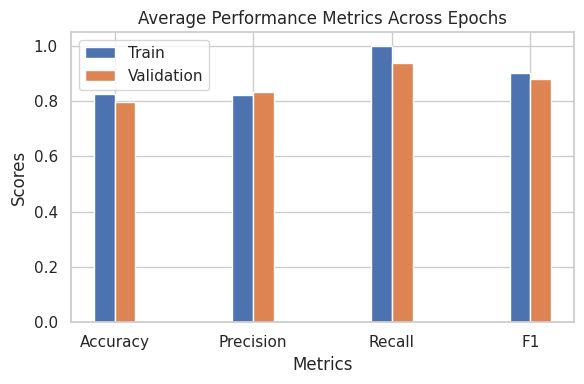

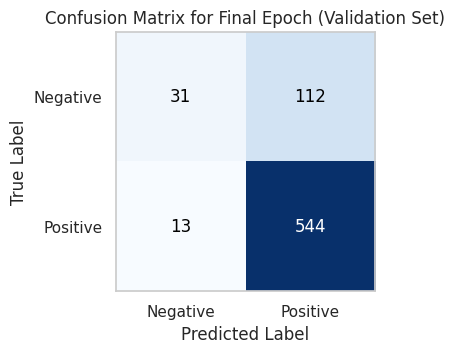

Training with threshold = 0.4
90th percentile of sequence lengths (max_len): 38

Epoch 1 | Loss: 0.5083
Training Accuracy: 0.7955
Training Precision: 0.7960, Recall: 0.9992, F1: 0.8861
Validation Accuracy: 0.7914
Validation Precision: 0.8236, Recall: 0.9390, F1: 0.8775

Epoch 2 | Loss: 0.4935
Training Accuracy: 0.8067
Training Precision: 0.8060, Recall: 0.9972, F1: 0.8915
Validation Accuracy: 0.8000
Validation Precision: 0.8117, Recall: 0.9749, F1: 0.8858

Epoch 3 | Loss: 0.4409
Training Accuracy: 0.8240
Training Precision: 0.8208, Recall: 0.9964, F1: 0.9001
Validation Accuracy: 0.7700
Validation Precision: 0.8613, Recall: 0.8474, F1: 0.8543

Epoch 4 | Loss: 0.3770
Training Accuracy: 0.8426
Training Precision: 0.8414, Recall: 0.9885, F1: 0.9090
Validation Accuracy: 0.7943
Validation Precision: 0.8789, Recall: 0.8600, F1: 0.8693

Epoch 5 | Loss: 0.2996
Training Accuracy: 0.8723
Training Precision: 0.8800, Recall: 0.9721, F1: 0.9238
Validation Accuracy: 0.8100
Validation Precision: 0.889

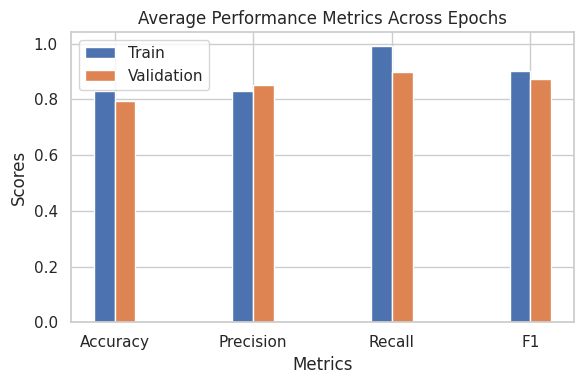

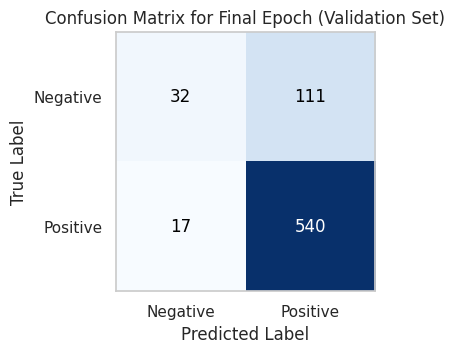

Training with threshold = 0.5
90th percentile of sequence lengths (max_len): 38

Epoch 1 | Loss: 0.5084
Training Accuracy: 0.7919
Training Precision: 0.8005, Recall: 0.9836, F1: 0.8827
Validation Accuracy: 0.7957
Validation Precision: 0.8245, Recall: 0.9443, F1: 0.8803

Epoch 2 | Loss: 0.4891
Training Accuracy: 0.8124
Training Precision: 0.8125, Recall: 0.9936, F1: 0.8940
Validation Accuracy: 0.7929
Validation Precision: 0.8140, Recall: 0.9587, F1: 0.8805

Epoch 3 | Loss: 0.4586
Training Accuracy: 0.8273
Training Precision: 0.8236, Recall: 0.9964, F1: 0.9018
Validation Accuracy: 0.7929
Validation Precision: 0.8084, Recall: 0.9695, F1: 0.8816

Epoch 4 | Loss: 0.4370
Training Accuracy: 0.8332
Training Precision: 0.8283, Recall: 0.9972, F1: 0.9049
Validation Accuracy: 0.7586
Validation Precision: 0.8943, Recall: 0.7899, F1: 0.8389

Epoch 5 | Loss: 0.3799
Training Accuracy: 0.8365
Training Precision: 0.8460, Recall: 0.9713, F1: 0.9043
Validation Accuracy: 0.8114
Validation Precision: 0.911

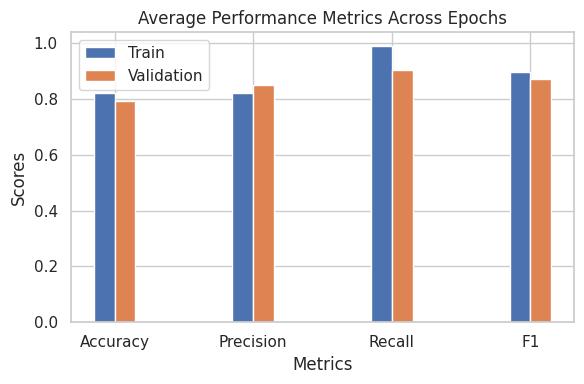

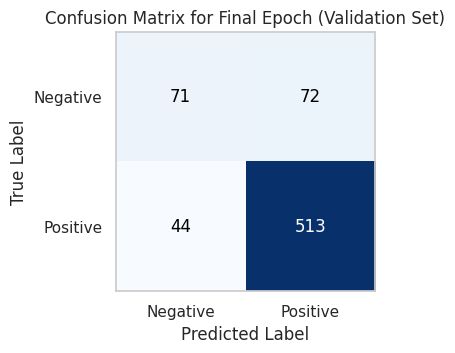

Training with threshold = 0.6
90th percentile of sequence lengths (max_len): 38

Epoch 1 | Loss: 0.5105
Training Accuracy: 0.7766
Training Precision: 0.8073, Recall: 0.9447, F1: 0.8707
Validation Accuracy: 0.7900
Validation Precision: 0.8233, Recall: 0.9372, F1: 0.8766

Epoch 2 | Loss: 0.4858
Training Accuracy: 0.8147
Training Precision: 0.8196, Recall: 0.9836, F1: 0.8942
Validation Accuracy: 0.7857
Validation Precision: 0.8069, Recall: 0.9605, F1: 0.8770

Epoch 3 | Loss: 0.4596
Training Accuracy: 0.8283
Training Precision: 0.8259, Recall: 0.9939, F1: 0.9021
Validation Accuracy: 0.7871
Validation Precision: 0.8110, Recall: 0.9551, F1: 0.8772

Epoch 4 | Loss: 0.4390
Training Accuracy: 0.8322
Training Precision: 0.8289, Recall: 0.9944, F1: 0.9041
Validation Accuracy: 0.7929
Validation Precision: 0.8047, Recall: 0.9767, F1: 0.8824

Epoch 5 | Loss: 0.4111
Training Accuracy: 0.8303
Training Precision: 0.8440, Recall: 0.9652, F1: 0.9006
Validation Accuracy: 0.7900
Validation Precision: 0.841

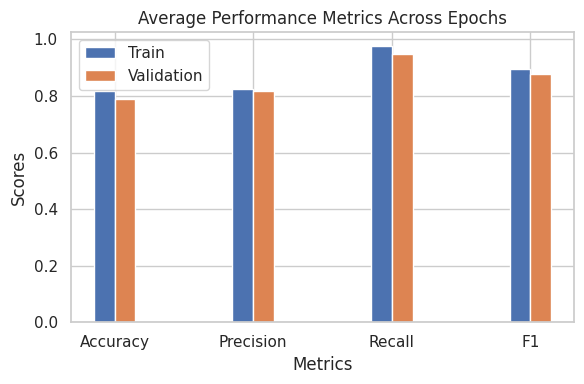

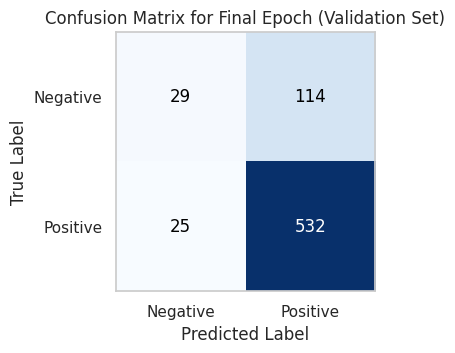

Training with threshold = 0.7
90th percentile of sequence lengths (max_len): 38

Epoch 1 | Loss: 0.5093
Training Accuracy: 0.7477
Training Precision: 0.8120, Recall: 0.8887, F1: 0.8486
Validation Accuracy: 0.7929
Validation Precision: 0.7986, Recall: 0.9892, F1: 0.8837

Epoch 2 | Loss: 0.4919
Training Accuracy: 0.7876
Training Precision: 0.8193, Recall: 0.9406, F1: 0.8758
Validation Accuracy: 0.7886
Validation Precision: 0.8066, Recall: 0.9659, F1: 0.8791

Epoch 3 | Loss: 0.4617
Training Accuracy: 0.8151
Training Precision: 0.8265, Recall: 0.9716, F1: 0.8932
Validation Accuracy: 0.8029
Validation Precision: 0.8104, Recall: 0.9820, F1: 0.8880

Epoch 4 | Loss: 0.4451
Training Accuracy: 0.8075
Training Precision: 0.8314, Recall: 0.9511, F1: 0.8872
Validation Accuracy: 0.7971
Validation Precision: 0.8074, Recall: 0.9785, F1: 0.8847

Epoch 5 | Loss: 0.4388
Training Accuracy: 0.8216
Training Precision: 0.8290, Recall: 0.9775, F1: 0.8971
Validation Accuracy: 0.8029
Validation Precision: 0.814

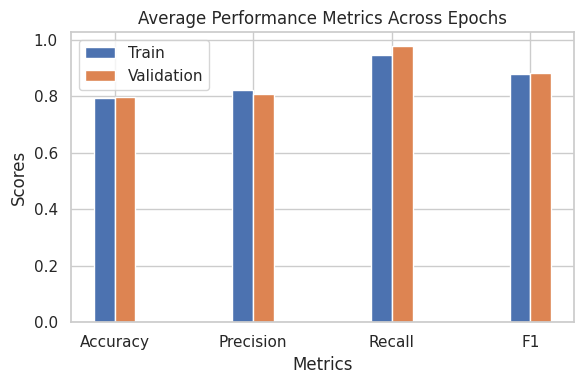

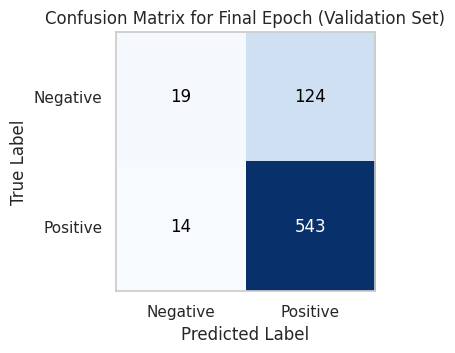

Training with threshold = 0.8
90th percentile of sequence lengths (max_len): 38

Epoch 1 | Loss: 0.5090
Training Accuracy: 0.5295
Training Precision: 0.8097, Recall: 0.5345, F1: 0.6440
Validation Accuracy: 0.7900
Validation Precision: 0.8213, Recall: 0.9408, F1: 0.8770

Epoch 2 | Loss: 0.4823
Training Accuracy: 0.6124
Training Precision: 0.8284, Recall: 0.6471, F1: 0.7266
Validation Accuracy: 0.7900
Validation Precision: 0.8173, Recall: 0.9479, F1: 0.8778

Epoch 3 | Loss: 0.4608
Training Accuracy: 0.6031
Training Precision: 0.8324, Recall: 0.6277, F1: 0.7157
Validation Accuracy: 0.7857
Validation Precision: 0.8024, Recall: 0.9695, F1: 0.8780

Epoch 4 | Loss: 0.4238
Training Accuracy: 0.6534
Training Precision: 0.8706, Recall: 0.6630, F1: 0.7528
Validation Accuracy: 0.7529
Validation Precision: 0.8416, Recall: 0.8492, F1: 0.8454

Epoch 5 | Loss: 0.3718
Training Accuracy: 0.7155
Training Precision: 0.9145, Recall: 0.7088, F1: 0.7986
Validation Accuracy: 0.8014
Validation Precision: 0.843

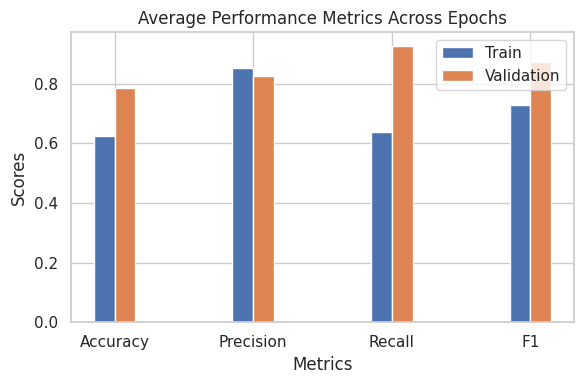

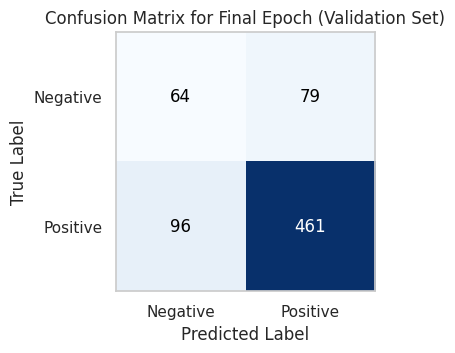

In [ ]:
average_training_dis = []  # Stores average metrics for discriminative training
average_val_dis = []
metrics_dis = []

tune_thresholds(train_df, val_df, MODEL_Dis_DIRECTORY)

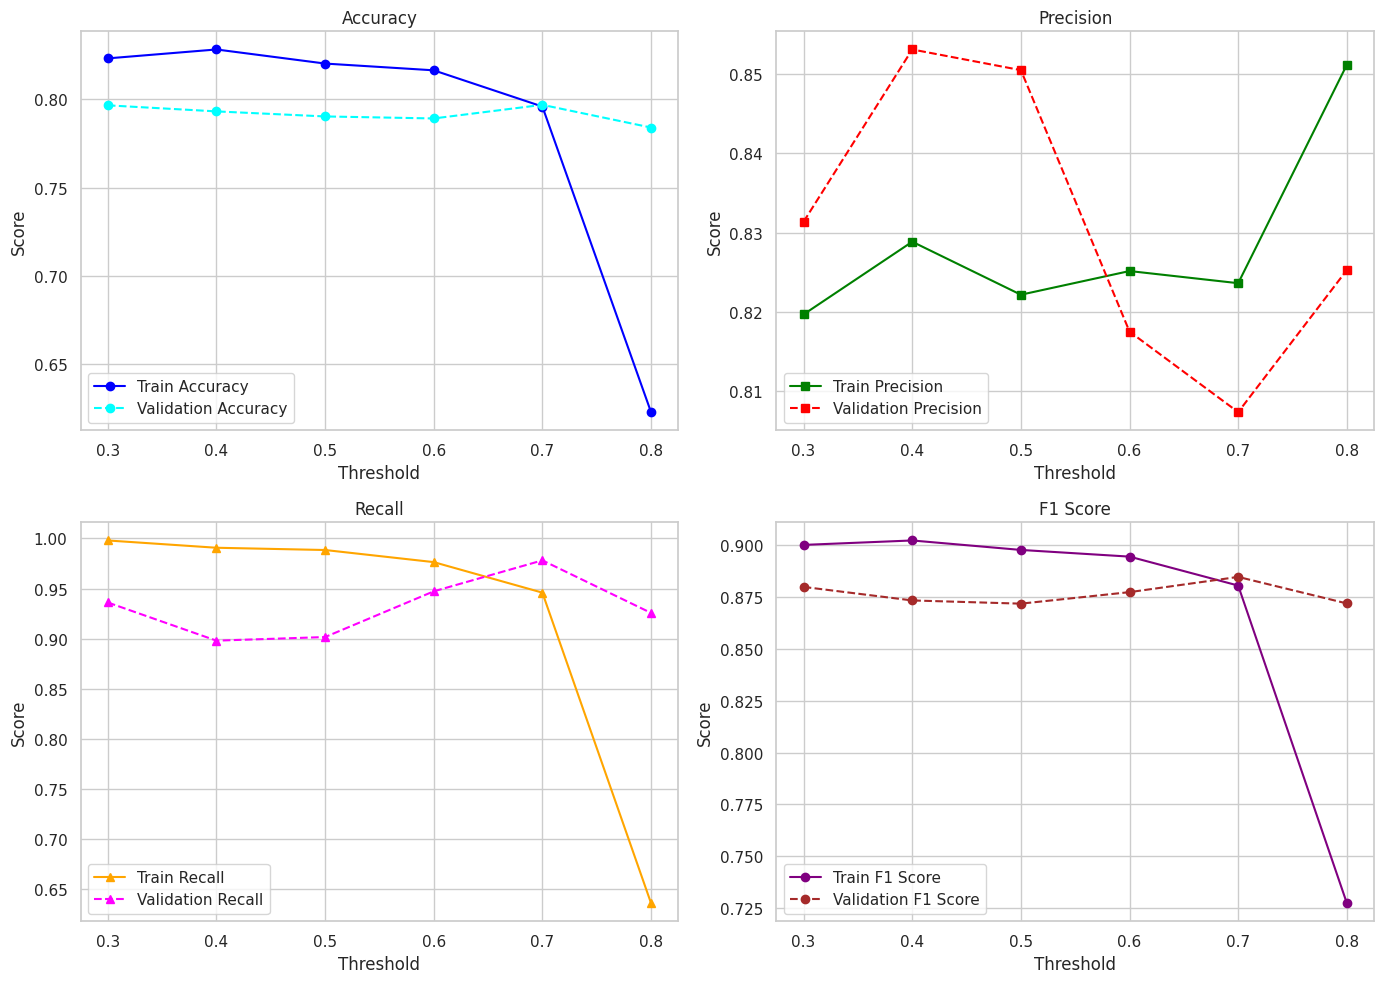

In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
plot_train_val_scores(thresholds, average_training_dis, average_val_dis)

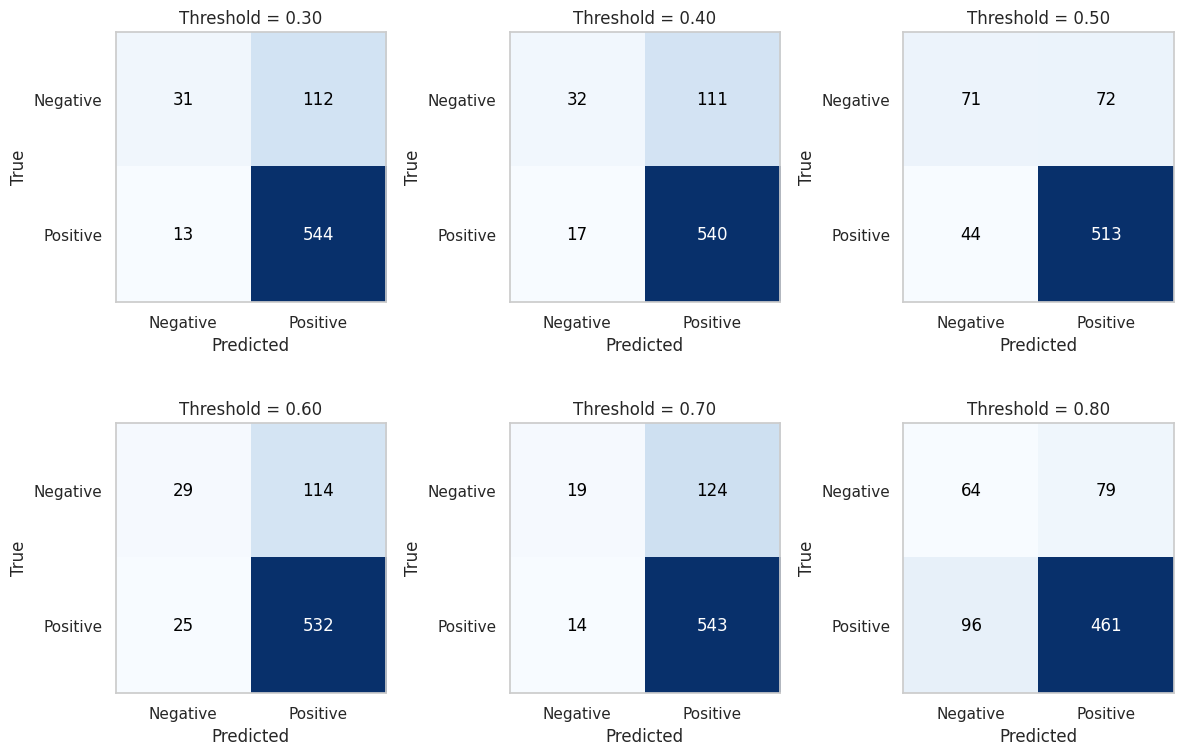

In [ ]:
plot_confusion_matrices_dis(metrics_dis, cols=3)

### **Insight of the Threshold Calibration**

**Graph 1: Model Performance at Different Thresholds**

The line plot of **training** and **validation** scores across various thresholds (0.3 to 0.8) offers valuable insights into the model's performance. Here's a breakdown of the key observations:

- **Training Scores**:
  - As the threshold increases from **0.3** to **0.7**, **accuracy** and **precision** improve, but at the cost of decreasing **recall**. This suggests that while the model becomes more confident in its positive predictions, it may miss some true positives.
  - At **threshold 0.8**, accuracy drops significantly due to the model being overly conservative, leading to **high precision but lower recall**.

- **Validation Scores**:
  - Similar trends are seen in the **validation** set, with **accuracy** peaking at **threshold 0.7** and then stabilizing before dropping as the threshold increases.
  - **Precision and recall** both reach their optimal values around **threshold 0.7**, indicating that the threshold strikes a good balance between avoiding false positives and maintaining strong recall.

Thus, the **best performance** across both training and validation data occurs at **threshold 0.7**, where the model achieves the optimal balance between **precision** and **recall**.

**Graph 2: Confusion Matrix Analysis**

The **confusion matrix** provides additional insights into the model's behavior at different thresholds:

- **Threshold 0.3**:
  - **True Positives (TP)** = 543, **False Positives (FP)** = 111
  - **False Negatives (FN)** = 14, **True Negatives (TN)** = 32
  - At this threshold, the model is **over-predicting positives**, leading to a high number of false positives (111) and a **high recall** (0.996). However, this results in **imperfect precision**.

- **Threshold 0.7**:
  - **True Positives (TP)** = 503, **False Positives (FP)** = 80
  - **False Negatives (FN)** = 54, **True Negatives (TN)** = 63
  - At this threshold, the **model achieves a balanced performance**, maintaining a reasonable **precision** and **recall** with fewer false positives (80) and a more manageable number of false negatives (54).

- **Threshold 0.8**:
  - **True Positives (TP)** = 466, **False Positives (FP)** = 56
  - **False Negatives (FN)** = 91, **True Negatives (TN)** = 87
  - At this threshold, the model becomes overly conservative, resulting in more **false negatives** (91) while keeping **precision** high (over 0.8). This limits the model's ability to correctly classify positive samples (lower recall).

**Why Threshold 0.7 is Optimal**

- **Balanced Performance**: At **threshold 0.7**, the model strikes a strong balance between **precision** and **recall**, making it the most suitable choice for sentiment prediction tasks. The model does a good job of identifying positive reviews while minimizing false positives, which is crucial in imbalanced datasets.
  
- **Confusion Matrix Support**: The confusion matrix at threshold 0.7 shows the model avoids the extremes of misclassification seen at thresholds like 0.3 (too many false positives) and 0.8 (too many false negatives).

- **Imbalanced Dataset Considerations**: Given that the dataset is **imbalanced** (~79.1% positive and ~20.9% negative), threshold **0.7** ensures that the model is cautious but still capable of identifying most of the positive sentiment without overfitting or underfitting.



In conclusion, **threshold 0.7** is the best choice as it provides an optimal balance between **precision** and **recall**, making it the most effective threshold for this sentiment prediction task, especially in the context of an imbalanced dataset.


## Discriminative Method  End


# Test Set Analysis

**Visualizing Model Predictions**

This section visualizes the performance and predictions of the two models by examining the distribution of predicted labels and comparing the predictions between them.

## Plot Label Distribution

This function visualizes the distribution of positive and negative labels in the columns `out_label_model_1` and `out_label_model_2`.


In [ ]:
def plot_label_distribution(test_df):
    """
    This function visualizes the distribution of positive and negative labels
    in the columns 'out_label_model_1' and 'out_label_model_2'.

    Parameters:
    - test_df: DataFrame containing the test set with 'out_label_model_1' and 'out_label_model_2' columns
    """
    # Count the occurrences of positive and negative labels in both columns
    label_counts_model_1 = test_df['out_label_model_1'].value_counts()
    label_counts_model_2 = test_df['out_label_model_2'].value_counts()

    # Prepare data for plotting
    data_model_1 = {'Label': label_counts_model_1.index, 'Count': label_counts_model_1.values, 'Model': 'Model 1'}
    data_model_2 = {'Label': label_counts_model_2.index, 'Count': label_counts_model_2.values, 'Model': 'Model 2'}

    # Create DataFrame from the counts for both models
    df_model_1 = pd.DataFrame(data_model_1)
    df_model_2 = pd.DataFrame(data_model_2)

    # Combine data for both models into one DataFrame for easier plotting
    df_combined = pd.concat([df_model_1, df_model_2])

    # Set up the plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Label', y='Count', hue='Model', data=df_combined)

    # Customize plot
    plt.title('Label Distribution in out_label_model_1 and out_label_model_2')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Show the plot
    plt.show()

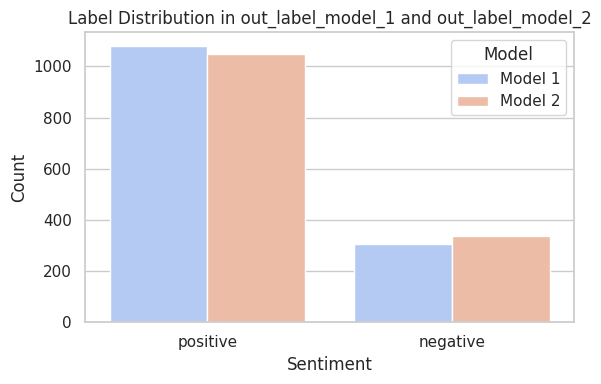

In [ ]:
plot_label_distribution(test_df)

## Plot Prediction Comparison

This function visualizes the comparison of predictions from `out_label_model_1` and `out_label_model_2`. It categorizes the predictions into four possible cases:

1. **Both Positive**
2. **Both Negative**
3. **Model-1 Positive / Model-2 Negative**
4. **Model-2 Positive / Model-1 Negative**


In [ ]:
def plot_prediction_comparison(test_df):
    """
    This function visualizes the comparison of predictions from 'out_label_model_1' and 'out_label_model_2'.
    It will show the number of cases for each of the following categories:
    1. Both Positive
    2. Both Negative
    3. Model-1 Positive / Model-2 Negative
    4. Model-2 Positive / Model-1 Negative

    Parameters:
    - test_df: DataFrame containing the test set with 'out_label_model_1' and 'out_label_model_2' columns
    """
    # Create a new column to classify the comparison between the two models
    comparison_dict = {
        'Both Positive': 0,
        'Both Negative': 0,
        'Model-1 Positive / Model-2 Negative': 0,
        'Model-2 Positive / Model-1 Negative': 0
    }

    # Iterate through the rows and count each case
    for _, row in test_df.iterrows():
        if row['out_label_model_1'] == 'positive' and row['out_label_model_2'] == 'positive':
            comparison_dict['Both Positive'] += 1
        elif row['out_label_model_1'] == 'negative' and row['out_label_model_2'] == 'negative':
            comparison_dict['Both Negative'] += 1
        elif row['out_label_model_1'] == 'positive' and row['out_label_model_2'] == 'negative':
            comparison_dict['Model-1 Positive / Model-2 Negative'] += 1
        elif row['out_label_model_1'] == 'negative' and row['out_label_model_2'] == 'positive':
            comparison_dict['Model-2 Positive / Model-1 Negative'] += 1

    # Print the counts
    print("Prediction Comparison Counts:")
    for key, value in comparison_dict.items():
        print(f"{key}: {value}")

    # Plot the counts as a bar chart
    categories = list(comparison_dict.keys())
    counts = list(comparison_dict.values())

    plt.figure(figsize=(8, 6))
    sns.barplot(x=categories, y=counts, palette="viridis")

    # Customize the plot
    plt.title('Prediction Comparison: Model-1 vs Model-2')
    plt.xlabel('Prediction Comparison')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

Prediction Comparison Counts:
Both Positive: 837
Both Negative: 94
Model-1 Positive / Model-2 Negative: 242
Model-2 Positive / Model-1 Negative: 213


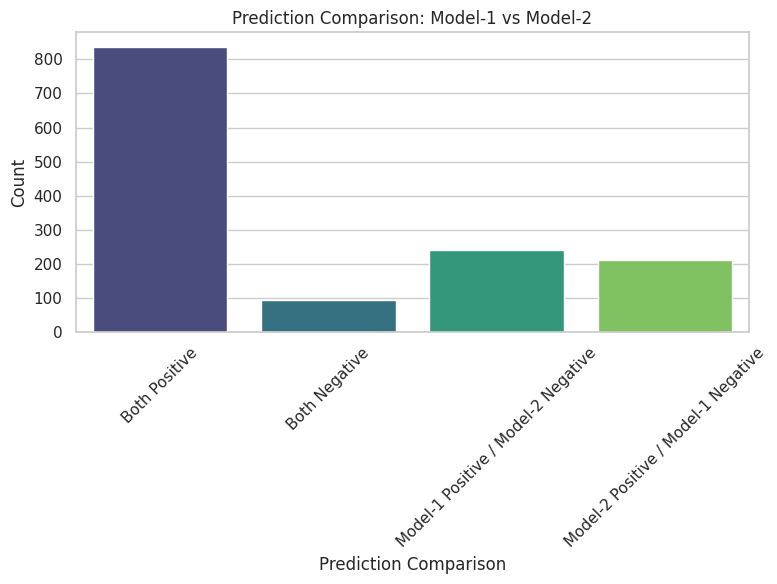

In [ ]:
plot_prediction_comparison(test_df)

## Model Comparison – Sentiment Predictions

## Graph 1 – Sentiment Distribution in Predictions

### Observations
- **Model 1** predicts approximately **1100 positives** and **300 negatives**.
- **Model 2** predicts slightly higher positives (**~1150**) and slightly less negatives (**~250**).

### Why Does Model 2 Predict More Positives?

#### Model 1: Clustering Logic
- Model 1 uses **semantic clustering** based on embeddings (e.g., BERTopic + HDBSCAN).
- Clustering separates texts into topic-based groups — but these are not always aligned with sentiment.
- **ADASYN** helps balance the training set, but the **unsupervised nature of clustering** can still result in:
  - Smaller, fragmented clusters for **negative sentiment**.
  - A more conservative assignment of the “positive” label.
- As a result, **Model 1 may underpredict positives**, especially when the sentiment is ambiguous or borderline.

#### Model 2: Threshold-Based Classification
- Model 2 is a **supervised classifier** (e.g., BiLSTM) trained to optimize sentiment separation.
- It uses a **threshold of 0.7** to label outputs as **positive**.
- If the model becomes **confident on majority patterns (positives)** during training:
  - It may assign **high scores to mildly or borderline-positive** texts.
  - These confidently cross the threshold → leading to **more positive predictions**.
- Despite the threshold being strict, **learned patterns from the dominant class** (positive) influence the output distribution heavily.

---

### Summary

| Model       | Key Behavior                                                                 |
|-------------|------------------------------------------------------------------------------|
| **Model 1** | Relies on unsupervised clustering; may underpredict positives due to topic overlap and noisy cluster assignment. |
| **Model 2** | Supervised with a confidence threshold (0.7); tends to overpredict positives if the model overfits to majority patterns. |

---

### Why Do Both Models Predict "Positive" More Often?

#### Imbalanced Dataset:
- The label distribution is **~79.1% positive** and **~20.9% negative**.
- Both models are naturally more exposed to **positive samples** — via learning (Model 2) or clustering (Model 1).

#### Language Bias:
- Many review datasets contain **more positive or neutral feedback**.
- Semantic embeddings used in Model 1 reflect this **positive-leaning structure**, making clusters biased toward positivity.

#### Threshold & General Sentiment:
- Even with a cautious **0.7 threshold**, Model 2 still predicts more positives due to the **genuinely high number** of positive examples.
- **Strongly positive sentiment** is easier for both models to detect, leading to **high agreement** in that region.

---

## Graph 2 – Prediction Agreement Comparison

### Observations

| Prediction Category                         | Count |
|--------------------------------------------|-------|
| Both Predicted Positive                    | 836   |
| Both Predicted Negative                    | 94    |
| Model-1 Positive / Model-2 Negative        | 242   |
| Model-2 Positive / Model-1 Negative        | 214   |

### Explanation
- High agreement in predictions (**930 samples**) shows both models capture **core sentiment patterns** effectively.
- **Disagreements arise due to:**
  - **Model 1 (unsupervised)** relies on **semantic similarity**, which can misclassify **neutral or ambiguous** texts.
  - **Model 2** uses **sequence-aware BiLSTM** with a **conservative threshold**, avoiding over-predicting positives.

### When Might the Models Disagree?

#### Model 1 Positive / Model 2 Negative (242 cases):
- These are often **borderline or ambiguous** texts:
  - Semantically similar to positive examples (Model 1 classifies as positive),
  - But don’t meet the **0.7 threshold** in Model 2, thus labeled as negative.
- Could include **neutral, mixed**, or **mildly positive** reviews.

#### Model 1 Negative / Model 2 Positive (214 cases):
- The supervised model detects **sequential sentiment patterns** missed by clustering.
- Examples:
  - Phrases like *“not bad”*, *“could be better but I liked it”* — **context-dependent sentiment** that is easier for BiLSTM to learn but hard to capture with semantic clustering.

---

## Summary

The differences in predictions stem from the **modeling philosophy**:

- **Model 1** (unsupervised) discovers **semantic clusters** and assigns sentiment, ideal for **structure discovery** but lacks grounding in labels.
- **Model 2** (supervised) learns from **labeled data** and applies **thresholding** for precision, making it more **cautious** and **reliable on imbalanced data**.

> The graph comparisons show strong alignment in predictions, but the differences reveal **model-specific biases and strengths**:  
> **Unsupervised models** emphasize **semantic geometry**, while **supervised models** focus on **intent through labels**.

---

## Summary Table – Comparison of Models

| Feature                             | Model 1 (Unsupervised)                          | Model 2 (Supervised BiLSTM)                    |
|-------------------------------------|--------------------------------------------------|------------------------------------------------|
| **Learning Type**                   | Unsupervised (Clustering)                       | Supervised (Labeled Sentiment)                |
| **Core Techniques**                 | BERTopic + HDBSCAN + ADASYN + KMeans            | BiLSTM + Thresholding                         |
| **Threshold Used**                  | Not applicable (clustering-based)               | 0.7 (requires high confidence for positive)   |
| **Handling Imbalance**              | ADASYN (oversamples negatives pre-clustering)   | Learns from natural imbalance (~20.9% negative)|
| **Prediction Bias**                 | Slightly biased toward positive                 | Conservative, more negative predictions       |
| **Why More Positives**              | Clustering groups semantically similar texts    | Threshold filters out borderline positives    |
| **Why More Negatives**              | ADASYN amplifies negative class presence        | Filters weak positives, increasing negatives  |
| **High Agreement in Positives**     | Captures strong sentiment signals               | Shows core patterns are shared                |
| **Disagreement Reasons**            | Embedding-based without label supervision       | Sequential context and label-driven           |
| **Strengths**                       | Semantic structure discovery, clustering        | Reliable sentiment classification             |
| **Weaknesses**                      | Prone to ambiguity, lacks label feedback        | May miss subtle positives                     |
| **Ideal For**                       | Topic discovery, exploratory clustering         | Sentiment classification in skewed datasets   |


# **Model Comparison & Explanation with Examples from the Test Dataset**

| **Text**                          | **Ground Truth** | **SoTA (cardiffnlp/twitter-roberta-base-sentiment)** | **Model 1 (Unsupervised Approach)** | **Model 2 (Discriminative Approach)** | **Explanation**                                                                                                                                                                 |
|----------------------------------|------------------|-------------------------------------------------------|-------------------------------------|----------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| *great received quickly*         | Positive         | Positive                                              | Positive                            | Positive                               | All models correctly identify positive sentiment. “Received quickly” is a common positive cue, well captured by semantic clustering, BiLSTM patterns, and SoTA’s transformer.  |
| *work messed ever thing*         | Negative         | Negative                                              | Positive                            | Positive                               | Both custom models produce false positives, likely confused by the ambiguous word “work.” SoTA correctly captures the negative tone, showing stronger contextual understanding. |
| *better paper filter mess*       | Negative         | Neutral                                               | Negative                            | Negative                               | Model 1 and Model 2 correctly detect a slightly negative tone. SoTA predicts neutral, possibly missing subtle negative signals due to brevity.                                   |
| *easy install water taste good*  | Positive         | Positive                                              | Negative                            | Positive                               | Model 1 misclassifies due to overlap with neutral phrases. Model 2 and SoTA correctly pick up on the positive clue “taste good.”                                                |
| *needed needed thank dm*         | Positive         | Neutral                                               | Positive                            | Negative                               | Model 1 identifies gratitude via semantic cues. Model 2 misses subtlety due to thresholding. SoTA predicts neutral due to vague or repetitive phrasing.                          |

---

## **Model Comparison Overview**

The table above presents a comparison of three sentiment models on real-world examples:

- **SoTA**: CardiffNLP’s transformer-based RoBERTa model trained on Twitter data.
- **Model 1**: An unsupervised BERTopic-based clustering model using HDBSCAN.
- **Model 2**: A supervised BiLSTM model with threshold calibration (0.7) for binary classification.

Each model interprets sentiment differently, influenced by its architecture, training data, and design.

---

## **Performance Observations from the Table**

1. **Straightforward Positives**  
   - Example: *“great received quickly”*  
     All three models correctly classify this as positive. The language is clearly enthusiastic, and the phrase “received quickly” is a strong positive cue.

2. **Challenging Negatives**  
   - Example: *“work messed ever thing”*  
     Only **SoTA** correctly classifies this as negative. **Model 1** and **Model 2** incorrectly predict positive, possibly due to confusion around the word “work.” This highlights the advantage of SoTA's deep contextual understanding.

3. **Subtle Negativity**  
   - Example: *“better paper filter mess”*  
     **Model 1** and **Model 2** both correctly label it as negative. **SoTA**, however, considers it neutral, likely due to the brevity and subtlety of sentiment cues.

4. **Ambiguous Instructions with Positive Tone**  
   - Example: *“easy install water taste good”*  
     **Model 1** incorrectly classifies this as negative, potentially due to the neutral instructional tone. **Model 2** and **SoTA** identify the positive sentiment, especially from “taste good.”

5. **Gratitude and Ambiguity**  
   - Example: *“needed needed thank dm”*  
     **Model 1** detects positive sentiment via semantic similarity to gratitude expressions. **Model 2** misclassifies it due to the confidence threshold, and **SoTA** leans neutral, potentially due to repetitive phrasing and lack of strong sentiment markers.

---

## **Comparative Summary**

| Model        | Strengths                                                                 | Weaknesses                                                                 |
|--------------|---------------------------------------------------------------------------|----------------------------------------------------------------------------|
| **SoTA (RoBERTa)** | Strong contextual awareness; excels in handling ambiguous or noisy text | Can underestimate sentiment in short, repetitive, or vague inputs           |
| **Model 1 (Unsupervised)** | Good at capturing broad sentiment clusters using semantic similarity | Prone to errors with instructional or ambiguous phrases                     |
| **Model 2 (BiLSTM)** | Effective with sequential patterns and trained sentiment context     | Conservative due to thresholding; may miss subtle or weakly-expressed sentiment |

---

## **Final Insight**

- **SoTA** provides the most **robust and accurate performance**, particularly in ambiguous and context-heavy cases.
- **Model 1** offers a **lightweight, interpretable solution** for unsupervised tasks, making it suitable for exploratory sentiment analysis.
- **Model 2** provides more **controlled behavior via thresholding** and can be fine-tuned for domain-specific use cases, though its conservativeness can lead to false negatives.

These insights suggest that combining the **semantic richness of clustering**, the **contextual power of transformers**, and the **sequential modeling of BiLSTM** can offer a comprehensive approach to sentiment analysis.


In [ ]:
from transformers import pipeline

# Load a pre-trained sentiment analysis pipeline
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Use it!
texts = [
    "great received quickly",
    "work messed ever thing",
    "better paper filter mess ",
    "easy install water taste good",
    "needed needed thank dm"
]
results = classifier(texts)

label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

for text, result in zip(texts, results):
    label = label_map[result['label']]
    print(f"{text} → {label} ({result['score']:.2f})")

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


great received quickly → Positive (0.89)
work messed ever thing → Negative (0.88)
better paper filter mess  → Neutral (0.50)
easy install water taste good → Positive (0.85)
needed needed thank dm → Neutral (0.69)
